## Initialize

In [1]:
%load_ext autoreload
%autoreload 2
%pylab --no-import-all inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# import psycopg2
import pandas as pd
import requests
import json
from pathlib import Path

In [3]:
import off_sample_utils as utils

/data/intsco/miniconda3/envs/off-smpl/lib/python3.6/site-packages/sklearn/utils/fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array
Using TensorFlow backend.


In [4]:
gs_path = Path('./GS/raw_images/')

In [5]:
import tensorflow as tf
print(tf.__version__)
from tensorflow.python.client import device_lib
for d in device_lib.list_local_devices():
    print(d)

1.11.0
name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8973762344708174043

name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1999831040
locality {
  bus_id: 1
  links {
  }
}
incarnation: 9943527354207541578
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:1e.0, compute capability: 3.7"



## Prepare Dataset Features and Masks

In [6]:
# def get_ds_paths():
# #     first_n=100
#     ds_to_exlude = ['Row001', 'HK_S2_N2_20um_New', '12_cylces_75um_new_submission',
#                     '50um_min(focusing)_high(m_z)_dry(application)', '100um_noM2_001_Recal', '50%meoh_8cyc_75um',
#                     'Servier_Ctrl_mouse_wb_lateral_plane_DHB', 'North Carolina State University__mouse body',
#                     '75um_small(focusing)_high(m_z)_dry(application)', 'Servier_Ctrl_rat_liver_9aa',
#                     'Servier_Ctrl_mouse_wb_median_plane_9aa', '20171110_94T_RDAM_1b',
#                     '20170905_CGL0170817_MT-MB_ATP_N_81x101_135x135', 'servier_TT_mouse_wb_fmpts_derivatization_CHCA',
#                     'Servier_Ctrl_mouse_wb_median_plane_DHB', 'slide077_animal121_rat_kidney - total ion count',
#                     '170321_kangaroobrain-bpyn1-pos_maxof50.0_med1r', '70%meoh_8cyc_75um',
#                     '75um_small(focusing)_low(m_z)_dry(application)', 'slide012_animal102_minipig_kidney- total ion count']
#     all_paths = [p for p in list(gs_path.iterdir()) if p.name not in ds_to_exlude]
#     return all_paths
len(get_ds_paths())

66

#### Cluster Dataset Pixels

In [16]:
from sklearn.cluster import KMeans
import pickle
from PIL import Image

/data/intsco/miniconda3/envs/off-smpl/lib/python3.6/site-packages/sklearn/utils/fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


In [17]:
# def create_ion_list(ds_paths):
# #     ions = set()
# #     ds_paths = ds_paths if type(ds_paths) == list else [ds_paths]
# #     for ds_path in ds_paths:
# #         for label in ['on', 'off']:
# #             for img_path in list((ds_path / label).iterdir()):
# #                 ions.add(img_path.name.split('.')[0])
# #     return np.array(sorted(list(ions)))
#     ions = set()
#     ds_paths = ds_paths if type(ds_paths) == list else [ds_paths]
#     for ds_path in ds_paths:
#         for label in ['on', 'off']:
#             for img_path in list((ds_path / label).iterdir()):
#                 ions.add(img_path.name.split('.')[0])
#     ions = np.array(sorted(list(ions)))
#     return ions

In [18]:
# def find_ion_ind(ions, ion):
#     t = np.where(np.array(ions) == ion)[0]
#     return t[0] if t.shape[0] > 0 else -1

In [19]:
# def create_ds_cube(ds_path, image_shape, ions):
#     image_cube = np.zeros(image_shape + ions.shape)
#     for label in ['on', 'off']:
#         for img_path in list((ds_path / label).iterdir()):
#             img = np.array(Image.open(img_path))[:,:,0]
#             ion = img_path.name.split('.')[0]
#             ion_ind = find_ion_ind(ions, ion)
#             if ion_ind > 0:
#                 image_cube[:,:,ion_ind] = img
#     return image_cube

In [20]:
def cluster(image_cube):
    kmeans = KMeans(n_clusters=5, random_state=13)
    clusters = kmeans.fit_predict(image_cube.reshape(-1, image_cube.shape[-1]))
    plt.imshow(clusters.reshape(image_shape), cmap='magma')
    plt.show()
    return clusters

In [21]:
def save_show_mask(ds_path, clusters, off_clusters):
    off_mask_flat = np.array([1 if x in off_clusters else 0 for x in clusters])
    off_mask = off_mask_flat.reshape(image_shape)
    pickle.dump(off_mask, open(ds_path / 'mask.pkl', 'wb'))
    plt.imshow(off_mask)
    plt.show()

In [23]:
def get_ds_image_shape(ds_path):
    image_shape = np.array(Image.open(next((ds_path / 'on').iterdir()))).shape[:2]
    return image_shape

GS/raw_images/MP 39
GS/raw_images/Mouse Kidney on coated plastic slide 270x160 30 um
GS/raw_images/BRB04S-RECAL
GS/raw_images/Mouse_Wholebody_3
GS/raw_images/Servier_Ctrl_mouse_wb_median_plane_9aa
GS/raw_images/20180220_mouse eye_DHB
GS/raw_images/CC-Esco2_centroids
GS/raw_images/Borderline14
GS/raw_images/20171110_94T_RDAM_1b
GS/raw_images/Dataset 8
GS/raw_images/20170905_CGL0170817_MT-MB_ATP_N_81x101_135x135
GS/raw_images/servier_TT_mouse_wb_fmpts_derivatization_CHCA
GS/raw_images/LNTO31_17_1-RECAL
GS/raw_images/2017023_ADP_GFlarvae_55x55_40x40_DMAN002
GS/raw_images/Esco2_centroids
GS/raw_images/20170105_VS_disc2_NEDC0001_70x80_10x10
GS/raw_images/DESI quan_Swales
GS/raw_images/170418_MouseBrain_pos_50um_205by129_atn0
GS/raw_images/PS_7_P7_N1_30um_New
GS/raw_images/Dataset 21
GS/raw_images/NCSU_mouse_LCC6_tumor
GS/raw_images/Rat51_Section2
GS/raw_images/NCSU_M8_mouse_brain
GS/raw_images/ICL__LNTO31_17_4
GS/raw_images/Mouse Kidney on plastic slide 260x175 30um
GS/raw_images/ICL__LNTO4

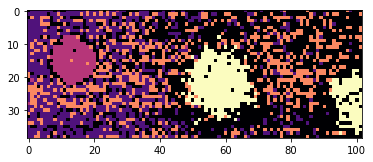

Off sample cluster numbers [0-4]: 013


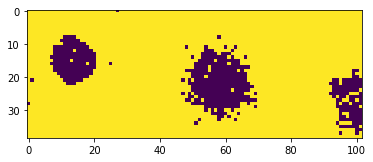

Continue?
GS/raw_images/Borderline13


In [30]:
for ds_path in list(gs_path.iterdir())[50:]:
    print(ds_path)
    if not (ds_path / 'mask.pkl').exists():
        image_shape = get_ds_image_shape(ds_path)
        
        ds_ions = utils.create_ion_list(ds_path)
        image_cube = utils.create_ds_cube(ds_path, image_shape, ds_ions)
        clusters = cluster(image_cube)
        
        off_clusters_s = input('Off sample cluster numbers [0-4]: ')
        off_clusters = [int(s) for s in off_clusters_s]

        save_show_mask(ds_path, clusters, off_clusters)
        input('Continue?')

## Classify Pixels

In [100]:
# def load_mask(ds_path):
#     mask = pickle.load(open(ds_path / 'mask.pkl', 'rb'))
#     return mask

In [104]:
# ds_to_exlude = ['Row001', 'HK_S2_N2_20um_New', '12_cylces_75um_new_submission']
# ds_paths = [p for p in list(gs_path.iterdir())[:10] if p.name not in ds_to_exlude]
# test_ds_paths = [p for p in list(gs_path.iterdir())[10:20] if p.name not in ds_to_exlude]
# len(ds_paths), len(test_ds_paths)

(9, 8)

In [105]:
ds_names = [p.name for p in ds_paths]
ds_names = np.array(ds_names)
ds_names

array(['Tumor11', 'ICL__LNTO30_16_1', 'Tumor41', '161007_WT1S1L1',
       'UoNotreDame__Untreated_6_574', 'Kidney_280x140_40um_E0',
       'Dataset 16', 'Esco1_centroids', 'Xenograft_3_135um'], 
      dtype='<U28')

In [106]:
# def ds_xygroups(ds_path, mask, ions):
#     image_shape = get_ds_image_shape(ds_path)
#     ds_cube = create_ds_cube(ds_path, image_shape, ions)
    
#     X = ds_cube.reshape(-1, ds_cube.shape[-1])
#     y = mask.reshape(-1)
#     groups = np.array([ds_path.name] * y.shape[0])
#     return X, y, groups

In [107]:
all_ions = create_ion_list(ds_paths + test_ds_paths)
len(all_ions)

3507

In [109]:
masks = [load_mask(ds_path) for ds_path in ds_paths]
len(masks)

In [198]:
# def prepare_pixel_xygroups(ds_paths, masks, all_ions):
#     X_list, y_list, groups_list = zip(*[ds_xygroups(ds_path, masks[ds_path.name], all_ions)
#                                         for ds_path in ds_paths])
#     X = np.concatenate(X_list)
#     y = np.concatenate(y_list)
#     groups = np.concatenate(groups_list)
#     return X, y, groups
# #     X.shape, y.shape, groups.shape

In [125]:
from sklearn.model_selection import GroupKFold, train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model.logistic import LogisticRegressionCV, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import sklearn
from xgboost.sklearn import XGBClassifier, XGBRegressor
from sklearn.metrics import (accuracy_score, f1_score, recall_score, precision_score,
                             roc_auc_score, explained_variance_score, mean_squared_error,
                             mean_absolute_error, log_loss, r2_score)
from sklearn.decomposition import PCA, NMF
from lightgbm import LGBMClassifier

In [129]:
# def pca_transform(X_train, X_valid, n_components=100):
#     pca = PCA(n_components=n_components)
#     X_train_pca = pca.fit_transform(X_train)
#     X_valid_pca = pca.transform(X_valid)
#     return X_train_pca, X_valid_pca

In [566]:
# def calc_metrics(model, ds_name, y_true, y_prob):
#     if type(model) == str:
#         model_name = model
#     else:
#         model_name = str(model.__class__).strip('<>\'').split('.')[-1]
#     return {
#         'model': model_name,
#         'group': ds_name,
#         'expl_var': explained_variance_score(y_true, y_prob),
#         'mse': mean_squared_error(y_true, y_prob),
#         'auc': roc_auc_score(y_true, y_prob),
#     }

In [114]:
# def plot_masks(mask, prob_masks):
#     fig, ax = plt.subplots(1, 1 + len(prob_masks), figsize=(10, 5 * len(prob_masks)))
#     ax[0].imshow(mask)
#     for i, pm in enumerate(prob_masks):
#         ax[1+i].imshow(pm)
#     plt.show()

In [115]:
from keras.layers import Dense, Input, Dropout
from keras.models import Sequential
from keras import Model
from keras.wrappers.scikit_learn import KerasClassifier

In [120]:
# def fit_predict(model, X_train, X_valid, y_train, y_valid):
#     model.fit(X_train, y_train)
#     return model.predict_proba(X_valid)[:,1]

In [36]:
def create_build_model(feature_n):
    def build_model():
        model_in = Input(shape=(feature_n,))
        out = Dense(256, activation='relu')(model_in)
        out = Dropout(0.75)(out)
        out = Dense(64, activation='relu')(out)
        out = Dropout(0.75)(out)
        out = Dense(64, activation='relu')(out)
        out = Dropout(0.75)(out)
        out = Dense(1, activation='sigmoid')(out)
        model = Model(model_in, out)
        model.compile(loss='binary_crossentropy',
                      optimizer='adam',
                      metrics=['binary_accuracy'])
        return model
    return build_model

#### Optimize Hyperparameters

In [27]:
cv = GroupKFold(n_splits=len(ds_names))
train_inds, valid_inds = next(cv.split(X, y, groups))
ds_name = groups[valid_inds][0]
mask = load_mask(gs_path / ds_name)
print(ds_name)

Kidney_280x140_40um_E0


In [34]:
X_train_l, X_valid_l, y_train_l, y_valid_l = train_test_split(X[train_inds], y[train_inds])
model = KerasClassifier(create_build_model(X_train_l.shape[-1]), batch_size=64, epochs=10, verbose=1)
hist = model.fit(X_train_l, y_train_l,
                 validation_data=(X_valid_l, y_valid_l))

Train on 59929 samples, validate on 19977 samples
Epoch 1/10
59929/59929 [==============================] - 6s 100us/step - loss: 0.5595 - binary_accuracy: 0.9493 - val_loss: 0.1694 - val_binary_accuracy: 0.9847
Epoch 2/10
59929/59929 [==============================] - 5s 91us/step - loss: 0.2676 - binary_accuracy: 0.9773 - val_loss: 0.2122 - val_binary_accuracy: 0.9823
Epoch 3/10
59929/59929 [==============================] - 5s 91us/step - loss: 0.2644 - binary_accuracy: 0.9782 - val_loss: 0.1635 - val_binary_accuracy: 0.9863
Epoch 4/10
59929/59929 [==============================] - 5s 91us/step - loss: 0.2286 - binary_accuracy: 0.9806 - val_loss: 0.1809 - val_binary_accuracy: 0.9851
Epoch 5/10
59929/59929 [==============================] - 5s 91us/step - loss: 0.2280 - binary_accuracy: 0.9811 - val_loss: 0.1938 - val_binary_accuracy: 0.9839
Epoch 6/10
59929/59929 [==============================] - 5s 91us/step - loss: 0.2256 - binary_accuracy: 0.9818 - val_loss: 0.1103 - val_binary_

39200/39200 [==============================] - 1s 25us/step
0.519029578145672


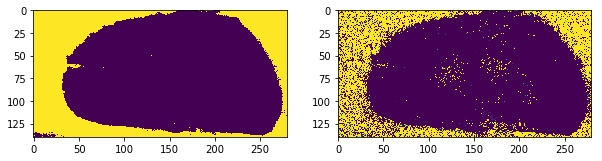

In [35]:
y_prob = model.predict_proba(X[valid_inds])[:,1]
print(explained_variance_score(y[valid_inds], y_prob))
plot_masks(mask, [y_prob.reshape(mask.shape)])

In [53]:
# for n in range(50, 150, 10):
#     model = XGBClassifier(n_estimators=n, tree_method='gpu_hist', n_jobs=4)
# #     model = LGBMClassifier(n_estimators=n, n_jobs=4)
#     y_prob = fit_predict(model, X[train_inds], X[valid_inds], y[train_inds], y[valid_inds])
#     print(n, explained_variance_score(y[valid_inds], y_prob))
#     plot_masks(mask, [y_prob.reshape(mask.shape)])

In [303]:
# for thr in np.linspace(0, 1, 21):
#     y_pred = (y_prob > thr).astype(int)
#     print(thr, accuracy_score(y[valid_inds], y_pred))

In [58]:
# for C in [0.001, 0.01, 0.1, 1.0, 10, 100]:
#     model = LogisticRegression()
#     y_prob = fit_predict(model, X[train_inds], X[valid_inds], y[train_inds], y[valid_inds])
#     print(C,
#           explained_variance_score(y[valid_inds], y_prob))
#     plot_masks(mask, [y_prob.reshape(mask.shape)])

In [119]:
# model = LogisticRegression()
# y_prob = run_model(model, X[train_inds], X[valid_inds], y[train_inds], y[valid_inds])

#### Cross Validation

In [ ]:
#     model = MultinomialNB()
# model_1 = LogisticRegression(solver='lbfgs', max_iter=300)
#     model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, n_jobs=4)
#     model_2 = XGBClassifier(n_estimators=150, tree_method='gpu_hist', n_jobs=4)=
# model_2 = KerasClassifier(build_fn=create_build_model(feature_n=X_train.shape[-1]),
#                           batch_size=64, epochs=5, verbose=0)
#     model = LGBMClassifier(n_jobs=4)

Kidney_280x140_40um_E0


/data/intsco/miniconda3/envs/off-smpl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[0.11622320915729922, 0.34579011191995424, 0.37441332413986972]


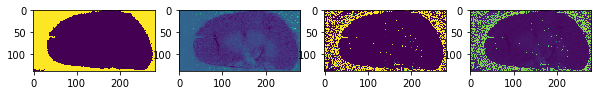

Xenograft_3_135um


/data/intsco/miniconda3/envs/off-smpl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[0.54153166084508009, 0.93612456236626684, 0.84712954416015107]


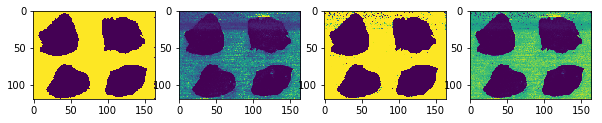

Esco1_centroids


/data/intsco/miniconda3/envs/off-smpl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[0.81059262675604282, 0.68796521389593757, 0.76868701725511857]


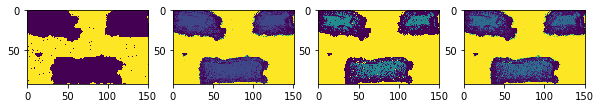

161007_WT1S1L1


/data/intsco/miniconda3/envs/off-smpl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[0.87650604213005567, 0.70242656693083938, 0.8192153522130643]


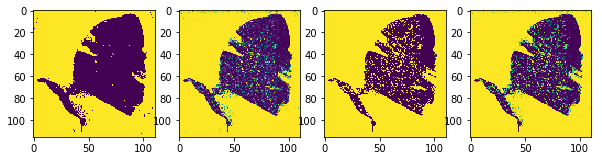

Dataset 16


/data/intsco/miniconda3/envs/off-smpl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[0.98615537707092082, 0.96871442923504225, 0.97982132344968198]


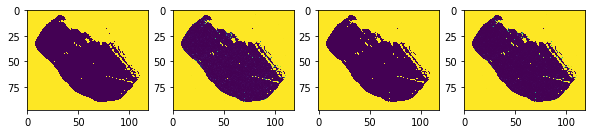

ICL__LNTO30_16_1


/data/intsco/miniconda3/envs/off-smpl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[0.83877464546502956, 0.26434285669572144, 0.66703209592568469]


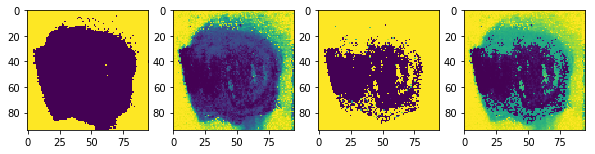

Tumor11


/data/intsco/miniconda3/envs/off-smpl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[0.34574665548681349, 0.63462134795462677, 0.60969619524937757]


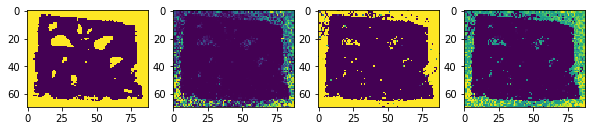

UoNotreDame__Untreated_6_574


/data/intsco/miniconda3/envs/off-smpl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[0.48259198201284637, 0.30052747288084558, 0.43001443803557882]


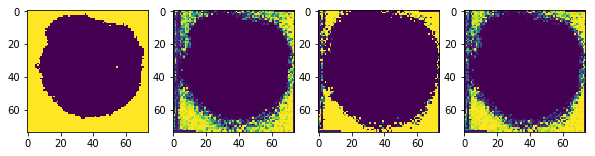

Tumor41


/data/intsco/miniconda3/envs/off-smpl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[0.36226112148932865, 0.27607052904330431, 0.42459004740729456]


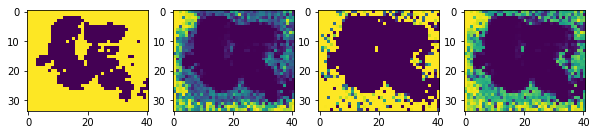

In [58]:
cv = GroupKFold(n_splits=len(ds_names))
metrics = []
pred_masks = {}

for train_inds, valid_inds in cv.split(X, y, groups):
    ds_name = groups[valid_inds][0]
    print(ds_name)
    X_train, X_valid = X[train_inds], X[valid_inds]
    y_train, y_valid = y[train_inds], y[valid_inds]
    
#     model = MultinomialNB()
    model_1 = LogisticRegression(solver='lbfgs', max_iter=300)
#     model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, n_jobs=4)
#     model_2 = XGBClassifier(n_estimators=150, tree_method='gpu_hist', n_jobs=4)=
    model_2 = KerasClassifier(create_build_model(feature_n=X_train.shape[-1]),
                              batch_size=64, epochs=5, verbose=0)
#     model = LGBMClassifier(n_jobs=4)

    y_prob_1 = fit_predict(model_1, X_train, X_valid, y_train, y_valid)
    y_prob_2 = fit_predict(model_2, X_train, X_valid, y_train, y_valid)
    y_prob_3 = (y_prob_1 + y_prob_2) / 2
    
    m1 = calc_metrics(model_1, ds_name, y_valid, y_prob_1)
    m2 = calc_metrics(model_2, ds_name, y_valid, y_prob_2)
    m3 = calc_metrics('<blend>', ds_name, y_valid, y_prob_3)
    metrics.extend([m1, m2, m3])
    
    mask = load_mask(gs_path / ds_name)
    prob_mask_1 = y_prob_1.reshape(mask.shape)
    prob_mask_2 = y_prob_2.reshape(mask.shape)
    prob_mask_3 = y_prob_3.reshape(mask.shape)
    pred_masks[ds_name] = [prob_mask_1, prob_mask_2, prob_mask_3]
    
    print([m1['expl_var'], m2['expl_var'], m3['expl_var']])
    plot_masks(mask, [prob_mask_1, prob_mask_2, prob_mask_3])

In [141]:
def cv_model(model, X, y, groups, do_pca=True):
    pred_masks = {}
    metrics = []
    cv = GroupKFold(n_splits=np.unique(groups).shape[0])
    for train_inds, valid_inds in cv.split(X, y, groups):
        ds_name = groups[valid_inds][0]
        print(ds_name)
        
        X_train, X_valid = X[train_inds], X[valid_inds]
        y_train, y_valid = y[train_inds], y[valid_inds]
        if do_pca:
            X_train, X_valid = pca_transform(X_train, X_valid)

        model.fit(X_train, y_train)
        y_prob = model.predict_proba(X_valid)[:,1]
        
        mask = load_mask(gs_path / ds_name)
        prob_mask = y_prob.reshape(mask.shape)
        pred_masks[ds_name] = prob_mask
        
        m = calc_metrics(model, ds_name, y_valid, y_prob)
        metrics.append(m)
        print(m)
        plot_masks(mask, [prob_mask])
        
    return pred_masks, metrics

Kidney_280x140_40um_E0


/data/intsco/miniconda3/envs/off-smpl/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


{'model': 'LogisticRegression', 'group': 'Kidney_280x140_40um_E0', 'expl_var': 0.098778422413703715, 'mse': 0.24888306674516877, 'auc': 0.98570312012164818}


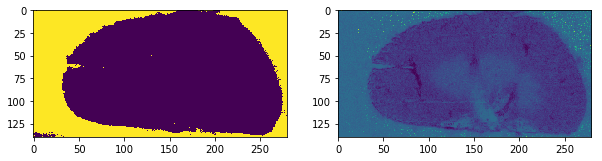

Xenograft_3_135um


/data/intsco/miniconda3/envs/off-smpl/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


{'model': 'LogisticRegression', 'group': 'Xenograft_3_135um', 'expl_var': 0.53647261407697455, 'mse': 0.23497511480966016, 'auc': 0.99075001609099889}


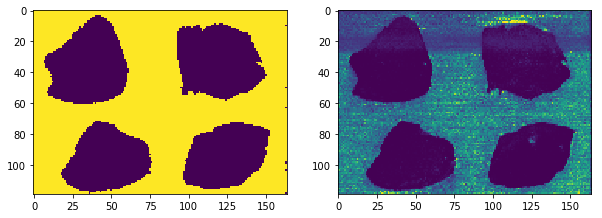

Esco1_centroids


/data/intsco/miniconda3/envs/off-smpl/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


{'model': 'LogisticRegression', 'group': 'Esco1_centroids', 'expl_var': 0.85908109611293115, 'mse': 0.045406285323095021, 'auc': 0.99630726179183182}


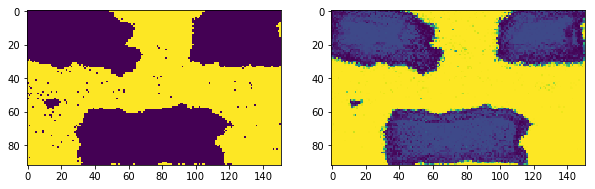

161007_WT1S1L1


/data/intsco/miniconda3/envs/off-smpl/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


{'model': 'LogisticRegression', 'group': '161007_WT1S1L1', 'expl_var': 0.90880152937004077, 'mse': 0.023624705304099831, 'auc': 0.99887045159868948}


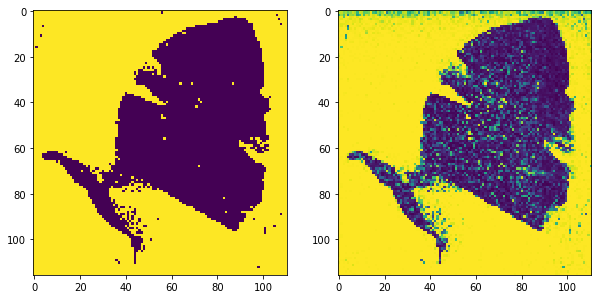

Dataset 16


/data/intsco/miniconda3/envs/off-smpl/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


{'model': 'LogisticRegression', 'group': 'Dataset 16', 'expl_var': 0.99084382505552182, 'mse': 0.0022214928403876629, 'auc': 0.99997888841476257}


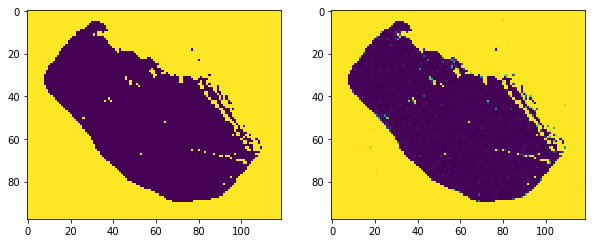

ICL__LNTO30_16_1


/data/intsco/miniconda3/envs/off-smpl/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


{'model': 'LogisticRegression', 'group': 'ICL__LNTO30_16_1', 'expl_var': 0.83664726732119132, 'mse': 0.04040755626365606, 'auc': 0.99689793007417382}


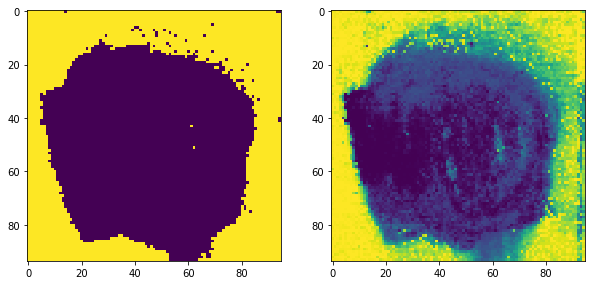

Tumor11


/data/intsco/miniconda3/envs/off-smpl/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


{'model': 'LogisticRegression', 'group': 'Tumor11', 'expl_var': 0.36840900605612903, 'mse': 0.22467727065642132, 'auc': 0.99340017193386909}


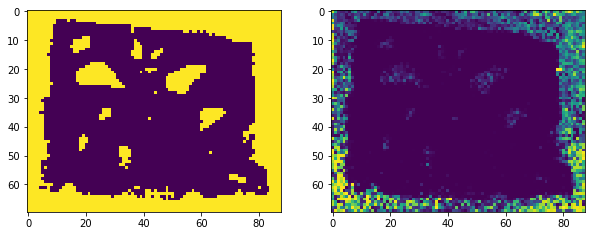

UoNotreDame__Untreated_6_574


/data/intsco/miniconda3/envs/off-smpl/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


{'model': 'LogisticRegression', 'group': 'UoNotreDame__Untreated_6_574', 'expl_var': 0.33022818922101493, 'mse': 0.25566415137647169, 'auc': 0.99852952068909928}


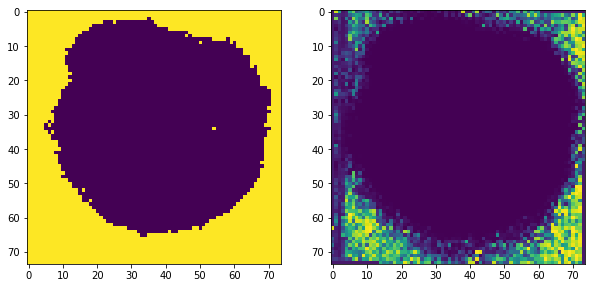

Tumor41


/data/intsco/miniconda3/envs/off-smpl/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


{'model': 'LogisticRegression', 'group': 'Tumor41', 'expl_var': 0.3637305377164417, 'mse': 0.30009617486789342, 'auc': 0.99888885207152878}


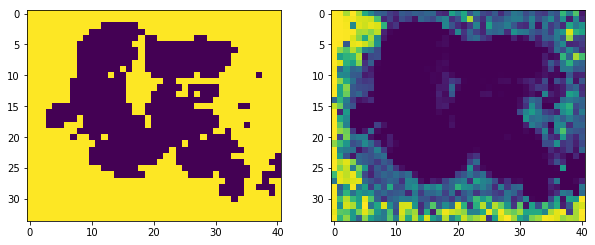

CPU times: user 43min 49s, sys: 2min 36s, total: 46min 25s
Wall time: 13min 57s


In [142]:
%%time
# model = sklearn.linear_model.SGDClassifier(loss='log', average=True, max_iter=100)
model = LogisticRegression(solver='saga', max_iter=100)
prob_masks, metrics = cv_model(model, X, y, groups, do_pca=True)

In [143]:
# masks = [load_mask(ds_path) for ds_path in ds_paths]

# metrics = [calc_metrics(model, ds_name, mask.flatten(), prob_mask.flatten())
#            for ds_name, mask, prob_mask in zip(ds_names, masks, prob_masks)]

In [148]:
metrics_df = pd.DataFrame(metrics)
print(metrics_df.groupby('model').agg([np.mean, np.std]))
metrics_df

                         auc           expl_var                 mse         
                        mean       std     mean       std      mean      std
model                                                                       
LogisticRegression  0.995481  0.004712  0.58811  0.317699  0.152884  0.12091


,auc,expl_var,group,model,mse
0,0.985703,0.098778,Kidney_280x140_40um_E0,LogisticRegression,0.248883
1,0.990750,0.536473,Xenograft_3_135um,LogisticRegression,0.234975
2,0.996307,0.859081,Esco1_centroids,LogisticRegression,0.045406
3,0.998870,0.908802,161007_WT1S1L1,LogisticRegression,0.023625
4,0.999979,0.990844,Dataset 16,LogisticRegression,0.002221
5,0.996898,0.836647,ICL__LNTO30_16_1,LogisticRegression,0.040408
6,0.993400,0.368409,Tumor11,LogisticRegression,0.224677
7,0.998530,0.330228,UoNotreDame__Untreated_6_574,LogisticRegression,0.255664
8,0.998889,0.363731,Tumor41,LogisticRegression,0.300096


In [ ]:
# # for n in range(5, 100, 5):
# n = 5
# val_n = int(X_train_pca.shape[0]*0.2)
# model = XGBClassifier(n_estimators=n, tree_method='gpu_hist', n_jobs=4)
# model.fit(X_train_pca[:-val_n], y[train_inds][:-val_n],
#           eval_set=(X_train_pca[-val_n:], y[train_inds][-val_n:]),
#           early_stopping_rounds=5)
# y_prob = model.predict_proba(X_valid_pca)[:,1]
# loss = log_loss(y[valid_inds], y_prob)
# print(n, loss)

## Classify Images Using Mask

In [149]:
test_ds_paths

[PosixPath('GS/raw_images/DESI porcine kidney interface region'),
 PosixPath('GS/raw_images/MPIMM_049_QE_P_BA_CF_sp3'),
 PosixPath('GS/raw_images/Dataset 4_recal'),
 PosixPath('GS/raw_images/ICL__LNTO41_17_2'),
 PosixPath('GS/raw_images/S649 WS21 155x105 15um E110'),
 PosixPath('GS/raw_images/Dataset 23'),
 PosixPath('GS/raw_images/Dataset 3'),
 PosixPath('GS/raw_images/ST-Pseudo_centroids')]

In [427]:
# def prepare_y(ds_path, ions):
#     y = []
#     off_ions = [p.name.split('.')[0] for p in (ds_path / 'off').iterdir()]
#     on_ions = [p.name.split('.')[0] for p in (ds_path / 'on').iterdir()]
#     for ion in ions:
#         if ion in off_ions:
#             y.append(1)
#         elif ion in on_ions:
#             y.append(0)
#         else:
#             y.append(None)
#     return np.array(y)

In [151]:
# def prepare_X(ds_cube, masks):
#     X = np.zeros((ds_cube.shape[-1], len(masks)))
#     for i in range(ds_cube.shape[-1]):
#         img = ds_cube[:,:,i] / 255.
#         for j, mask in enumerate(masks):
#             corr = np.corrcoef(img.flatten(), mask.flatten())[0,1]
#             X[i,j] = corr
#     return X

In [206]:
# def prepare_mask_matching_xygroups(ds_paths, pred_masks):
#     X, y, groups = [], [], []
#     for ds_path in ds_paths:
#         print(ds_path)
#         ds_ions = create_ion_list(ds_path)
#         image_shape = get_ds_image_shape(ds_path)
#         ds_cube = create_ds_cube(ds_path, image_shape, ds_ions)
#     #     mask = load_mask(ds_path)
#         masks = pred_masks[ds_path.name]
        
#         if type(masks) == list:
#             ds_X = prepare_X(ds_cube, masks)
#         else:
#             ds_X = prepare_X(ds_cube, [masks])
#         ds_y = prepare_y(ds_path, ds_ions)
#         ds_groups = [ds_path.name] * ds_y.shape[0]
#         X.append(ds_X), y.append(ds_y), groups.append(ds_groups)
#     X = np.concatenate(X)
#     y = np.concatenate(y)
#     groups = np.concatenate(groups)
#     return X, y, groups
# #     X.shape, y.shape, groups.shape

In [ ]:
X, y, groups = prepare_mask_matching_xygroups(ds_paths, pred_masks)

In [79]:
metrics = []
cv = GroupKFold(n_splits=np.unique(groups).shape[0])
for train_inds, valid_inds in cv.split(X, y, groups):
    model = LogisticRegression(solver='lbfgs')
    model.fit(X[train_inds], y[train_inds])
    acc = model.score(X[valid_inds], y[valid_inds])
#     y_pred = (X[valid_inds,0] > 0).astype(int)
#     acc = accuracy_score(y_true=y[valid_inds], y_pred=y_pred)
    metrics.append({
        'group': groups[valid_inds][0],
        'acc': acc
    })

metrics_df = pd.DataFrame(metrics)
metrics_df

,acc,group
0,0.977833,Tumor11
1,0.994898,Dataset 16
2,0.993631,Xenograft_3_135um
3,0.993569,UoNotreDame__Untreated_6_574
4,0.996454,Esco1_centroids
5,0.994565,161007_WT1S1L1
6,0.988235,Kidney_280x140_40um_E0
7,1.000000,Tumor41
8,0.971429,ICL__LNTO30_16_1


In [80]:
metrics_df.acc.mean()

0.99006812891409923

In [81]:
model.coef_

array([[ 6.36029213,  5.86171027,  6.22096953]])

## Mask Based Test Set Classification

In [326]:
test_ds_paths

[PosixPath('GS/raw_images/DESI porcine kidney interface region'),
 PosixPath('GS/raw_images/MPIMM_049_QE_P_BA_CF_sp3'),
 PosixPath('GS/raw_images/Dataset 4_recal'),
 PosixPath('GS/raw_images/ICL__LNTO41_17_2'),
 PosixPath('GS/raw_images/S649 WS21 155x105 15um E110'),
 PosixPath('GS/raw_images/Dataset 23'),
 PosixPath('GS/raw_images/Dataset 3'),
 PosixPath('GS/raw_images/ST-Pseudo_centroids')]

In [327]:
len(all_ions)

3507

In [328]:
masks = {ds_path.name: load_mask(ds_path) for ds_path in ds_paths}
test_masks = {ds_path.name: load_mask(ds_path) for ds_path in test_ds_paths}
len(masks), len(test_masks)

(9, 8)

In [329]:
X_train, y_train, groups_train = prepare_pixel_xygroups(ds_paths, masks, all_ions)
X_test, y_test, groups_test = prepare_pixel_xygroups(test_ds_paths, test_masks, all_ions)

In [330]:
X_train.shape, X_test.shape

((119106, 3507), (153591, 3507))

In [332]:
X_train_pca, X_test_pca = pca_transform(X_train, X_test)
X_train_pca.shape, X_test_pca.shape

((119106, 100), (153591, 100))

In [334]:
model = LogisticRegression(solver='saga', max_iter=100)
model.fit(X_train_pca, y_train)
y_test_prob = model.predict_proba(X_test_pca)[:,1]
y_test_prob.shape

(153591,)

In [336]:
test_prob_masks = {
    ds_path.name: y_test_prob[groups_test == ds_path.name].reshape(test_masks[ds_path.name].shape)
    for ds_path in test_ds_paths
}
len(test_prob_masks)

8

In [338]:
# mask matching dataset
X_mm_test, y_mm_test, groups_mm_test = \
    prepare_mask_matching_xygroups(test_ds_paths, test_prob_masks)

GS/raw_images/DESI porcine kidney interface region
GS/raw_images/MPIMM_049_QE_P_BA_CF_sp3
GS/raw_images/Dataset 4_recal
GS/raw_images/ICL__LNTO41_17_2
GS/raw_images/S649 WS21 155x105 15um E110
GS/raw_images/Dataset 23
GS/raw_images/Dataset 3
GS/raw_images/ST-Pseudo_centroids


In [339]:
def mask_match_cv_model(X, y, groups):
    metrics = []
    cv = GroupKFold(n_splits=np.unique(groups).shape[0])
    for train_inds, valid_inds in cv.split(X, y, groups):
        model = LogisticRegression(solver='saga')
        model.fit(X[train_inds], y[train_inds])
        acc = model.score(X[valid_inds], y[valid_inds])
    #     y_pred = (X[valid_inds,0] > 0).astype(int)
    #     acc = accuracy_score(y_true=y[valid_inds], y_pred=y_pred)
        metrics.append({
            'group': groups[valid_inds][0],
            'acc': acc
        })

    metrics_df = pd.DataFrame(metrics)
    return metrics_df

In [341]:
metrics_df = mask_match_cv_model(X_mm_test, y_mm_test, groups_mm_test)

In [342]:
metrics_df

,acc,group
0,0.997899,DESI porcine kidney interface region
1,0.426540,S649 WS21 155x105 15um E110
2,0.879888,Dataset 23
3,0.950581,Dataset 3
4,0.822222,ST-Pseudo_centroids
5,0.953125,Dataset 4_recal
6,0.994536,ICL__LNTO41_17_2
7,1.000000,MPIMM_049_QE_P_BA_CF_sp3


DESI porcine kidney interface region


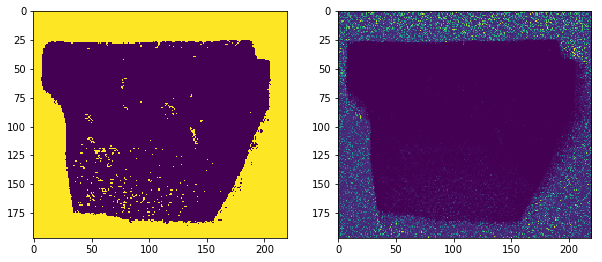

MPIMM_049_QE_P_BA_CF_sp3


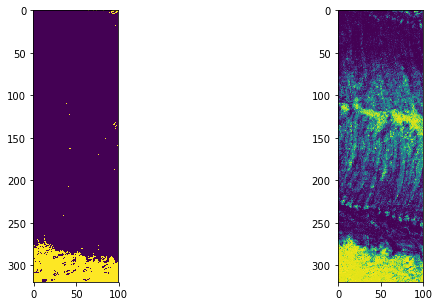

Dataset 4_recal


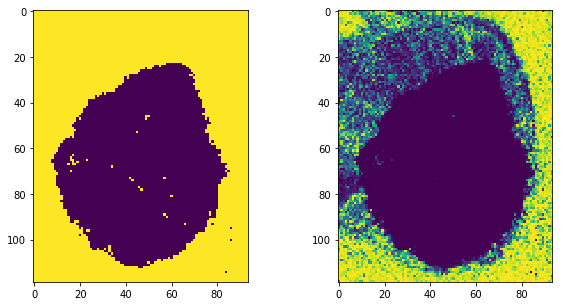

ICL__LNTO41_17_2


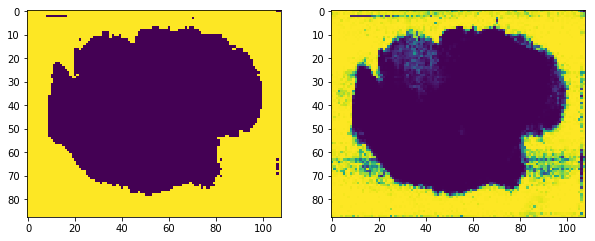

S649 WS21 155x105 15um E110


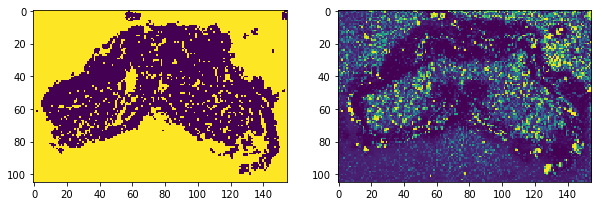

Dataset 23


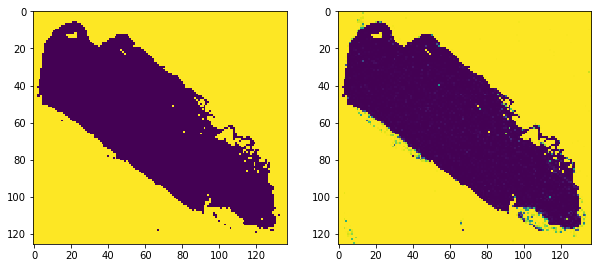

Dataset 3


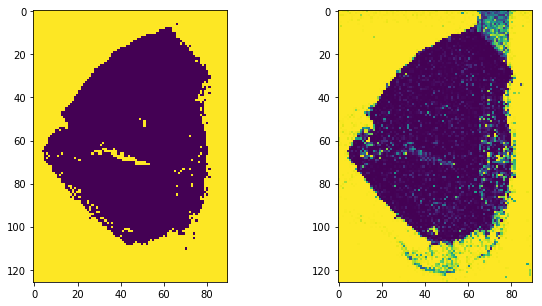

ST-Pseudo_centroids


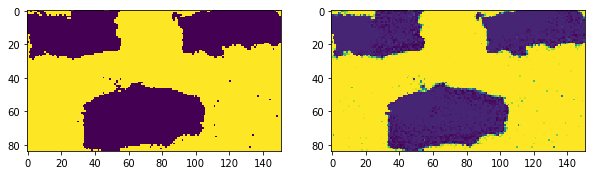

In [345]:
for ds_path in test_ds_paths:
    print(ds_path.name)
    m1 = test_masks[ds_path.name]
    m2 = test_prob_masks[ds_path.name]
    plot_masks(m1, [m2])

In [346]:
X_mask_test, y_mask_test, groups_mask_test = \
    prepare_mask_matching_xygroups(test_ds_paths, test_masks)
metrics_df = mask_match_cv_model(X_mask_test, y_mask_test, groups_mask_test)

GS/raw_images/DESI porcine kidney interface region
GS/raw_images/MPIMM_049_QE_P_BA_CF_sp3
GS/raw_images/Dataset 4_recal
GS/raw_images/ICL__LNTO41_17_2
GS/raw_images/S649 WS21 155x105 15um E110
GS/raw_images/Dataset 23
GS/raw_images/Dataset 3
GS/raw_images/ST-Pseudo_centroids


In [347]:
metrics_df

,acc,group
0,0.997899,DESI porcine kidney interface region
1,0.943128,S649 WS21 155x105 15um E110
2,0.997207,Dataset 23
3,0.979651,Dataset 3
4,0.995556,ST-Pseudo_centroids
5,0.979167,Dataset 4_recal
6,0.994536,ICL__LNTO41_17_2
7,1.000000,MPIMM_049_QE_P_BA_CF_sp3


In [348]:
metrics_df.agg([np.mean, np.std])

,acc
mean,0.985893
std,0.019095


In [350]:
ds_name = 'S649 WS21 155x105 15um E110'
model = LogisticRegression(solver='saga')
model.fit(X_mm_test[groups_mm_test != ds_name],
          y_mm_test[groups_mm_test != ds_name])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)

In [370]:
mask = test_masks[ds_name]
y_prob = model.predict_proba(X_mm_test[groups_mm_test == ds_name])[:,1]
y_prob.shape

(422,)

In [429]:
ds_ions = create_ion_list(gs_path / ds_name)
y = prepare_y(ds_path, ds_ions)
ds_ions.shape, y.shape

((422,), (422,))

In [431]:
sklearn.metrics.confusion_matrix(y, y_prob > 0.5)

array([[130, 209],
       [ 33,  50]])

In [544]:
# def plot_top_mistakes(ds_ions, y, y_prob, label, n=10):
#     df = pd.DataFrame({'y': y, 'y_prob': y_prob})
#     df['diff'] = np.abs(y - y_prob)
#     y_pred = y_prob > 0.5
#     top_m_df = df[(y == label) & ~(y == y_pred)].sort_values(by='diff', ascending=False).head(n)
    
#     for i, r in top_m_df.iterrows():
#         print(r)
#         img_path = gs_path / ds_name / ('off' if r.y == 1 else 'on') / f'{ds_ions[i]}.png'
#         print(img_path)
#         img = Image.open(img_path)
#         plt.imshow(np.array(img)[:,:,0])
#         plt.show()

y         1.000000
y_prob    0.149334
diff      0.850666
Name: 56, dtype: float64
GS/raw_images/S649 WS21 155x105 15um E110/off/C12H13NO5+K.png


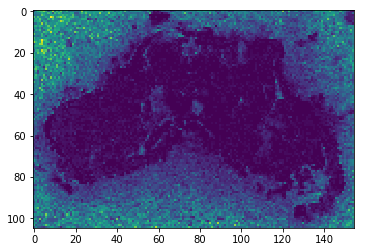

y         1.000000
y_prob    0.202195
diff      0.797805
Name: 304, dtype: float64
GS/raw_images/S649 WS21 155x105 15um E110/off/C41H66O14+H.png


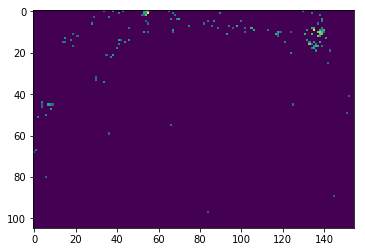

y         1.000000
y_prob    0.232963
diff      0.767037
Name: 381, dtype: float64
GS/raw_images/S649 WS21 155x105 15um E110/off/C7H7NO3+H.png


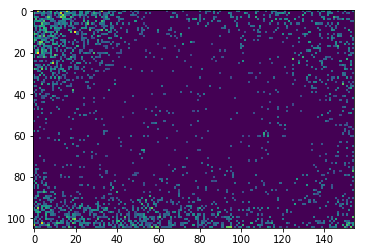

y         1.000000
y_prob    0.246196
diff      0.753804
Name: 243, dtype: float64
GS/raw_images/S649 WS21 155x105 15um E110/off/C23H36O4+H.png


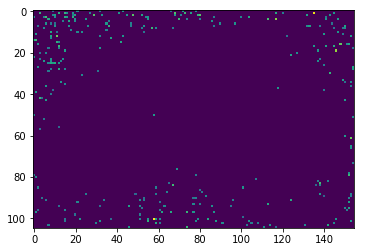

y         1.000000
y_prob    0.256271
diff      0.743729
Name: 295, dtype: float64
GS/raw_images/S649 WS21 155x105 15um E110/off/C37H44N4O6+Na.png


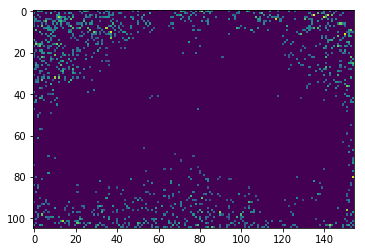

y         1.000000
y_prob    0.261116
diff      0.738884
Name: 4, dtype: float64
GS/raw_images/S649 WS21 155x105 15um E110/off/C10H12N4O5+K.png


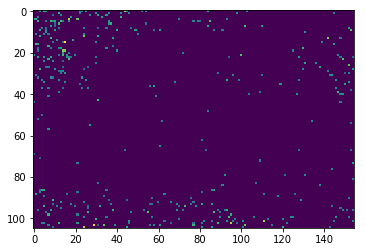

y         1.000000
y_prob    0.268087
diff      0.731913
Name: 101, dtype: float64
GS/raw_images/S649 WS21 155x105 15um E110/off/C14H15NO8+H.png


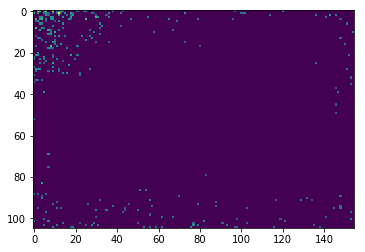

y         1.000000
y_prob    0.275427
diff      0.724573
Name: 289, dtype: float64
GS/raw_images/S649 WS21 155x105 15um E110/off/C34H38N4O4+Na.png


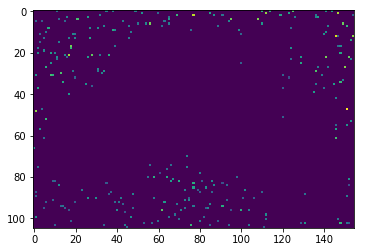

y         1.000000
y_prob    0.302546
diff      0.697454
Name: 262, dtype: float64
GS/raw_images/S649 WS21 155x105 15um E110/off/C26H42O4+H.png


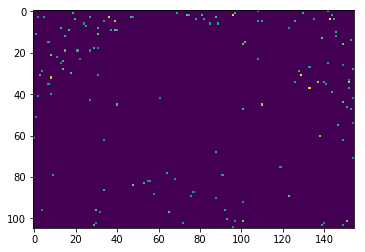

y         1.000000
y_prob    0.320728
diff      0.679272
Name: 27, dtype: float64
GS/raw_images/S649 WS21 155x105 15um E110/off/C11H11NO3+K.png


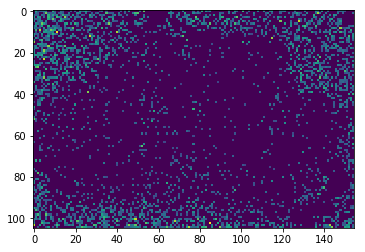

In [448]:
# plot_top_mistakes(ds_ions, y, y_prob, label=1, n=10)

## Mask Based Test Set Classification Full Set CV

In [7]:
import sklearn
from keras.layers import Dense, Input, Dropout
from keras.models import Sequential
from keras import Model
from keras.wrappers.scikit_learn import KerasClassifier

In [8]:
def create_build_model(feature_n):
    def build_model():
        model_in = Input(shape=(feature_n,))
        out = Dense(256, activation='relu')(model_in)
        out = Dropout(0.75)(out)
        out = Dense(64, activation='relu')(out)
        out = Dropout(0.75)(out)
        out = Dense(32, activation='relu')(out)
        out = Dropout(0.75)(out)
        out = Dense(1, activation='sigmoid')(out)
        model = Model(model_in, out)
        model.compile(loss='binary_crossentropy',
                      optimizer='adam',
                      metrics=['binary_accuracy'])
        return model
    return build_model

In [9]:
all_paths = get_ds_paths()
all_ds_names = [p.name for p in all_paths]
len(all_paths), len(all_ds_names)

(66, 66)

In [10]:
masks = {p.name: utils.load_mask(p) for p in all_paths}
ions = utils.create_ion_list(all_paths)
len(masks), len(ions)

(66, 9273)

In [11]:
X, y, groups = utils.prepare_pixel_xygroups(all_paths, masks, ions)
X = X.tocsr()
X.shape

(1285244, 9273)

CV with 22 splits
Epoch 1/3
1166444/1166444 [==============================] - 195s 168us/step - loss: 0.3736 - binary_accuracy: 0.9138
Epoch 2/3
1166444/1166444 [==============================] - 195s 167us/step - loss: 0.1026 - binary_accuracy: 0.9642
Epoch 3/3
1166444/1166444 [==============================] - 196s 168us/step - loss: 0.0971 - binary_accuracy: 0.9664
MPIMM_021_QE_P_CB_0
118800/118800 [==============================] - 8s 64us/step
GS/raw_images/MPIMM_021_QE_P_CB_0


/data/intsco/miniconda3/envs/off-smpl/lib/python3.6/site-packages/numpy/lib/function_base.py:3003: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/data/intsco/miniconda3/envs/off-smpl/lib/python3.6/site-packages/numpy/lib/function_base.py:3004: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/data/intsco/miniconda3/envs/off-smpl/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in greater


0.888235294118
[[ 20  14]
 [ 24 282]]


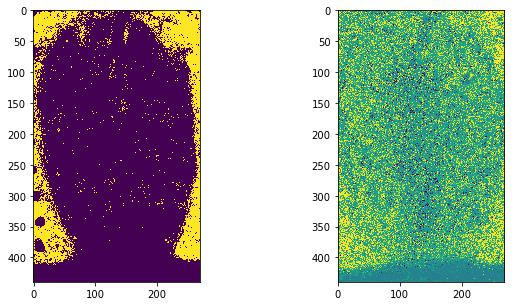

Epoch 1/3
1218316/1218316 [==============================] - 213s 174us/step - loss: 0.3483 - binary_accuracy: 0.9229
Epoch 2/3
1218316/1218316 [==============================] - 203s 166us/step - loss: 0.1067 - binary_accuracy: 0.9604
Epoch 3/3
1218316/1218316 [==============================] - 188s 155us/step - loss: 0.1011 - binary_accuracy: 0.9624
DESI quan_Swales
66928/66928 [==============================] - 4s 60us/step
GS/raw_images/DESI quan_Swales
0.978947368421
[[120   1]
 [  3  66]]


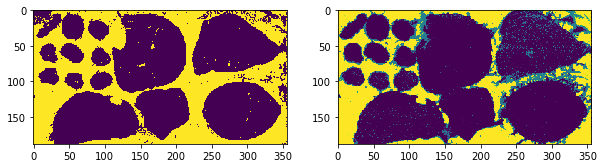

Epoch 1/3
1231094/1231094 [==============================] - 196s 159us/step - loss: 0.4036 - binary_accuracy: 0.9202
Epoch 2/3
1231094/1231094 [==============================] - 209s 170us/step - loss: 0.1059 - binary_accuracy: 0.9613
Epoch 3/3
1231094/1231094 [==============================] - 209s 170us/step - loss: 0.1016 - binary_accuracy: 0.9630
xenograft CT-26 S10
54150/54150 [==============================] - 4s 66us/step
GS/raw_images/xenograft CT-26 S10
0.978947368421
[[160   1]
 [  3  26]]


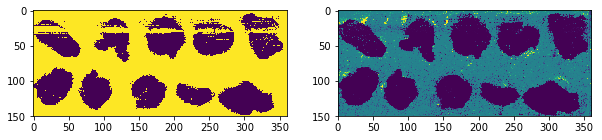

Epoch 1/3
1230614/1230614 [==============================] - 216s 176us/step - loss: 0.3298 - binary_accuracy: 0.9132
Epoch 2/3
1230614/1230614 [==============================] - 215s 175us/step - loss: 0.1106 - binary_accuracy: 0.9597
Epoch 3/3
1230614/1230614 [==============================] - 216s 175us/step - loss: 0.1055 - binary_accuracy: 0.9614
AstraZeneca__CT26_xenograft
50652/50652 [==============================] - 4s 72us/step
GS/raw_images/AstraZeneca__CT26_xenograft
0.980487804878
[[136   4]
 [  0  65]]


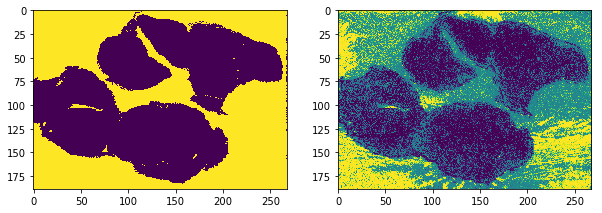

20170817_CGL_MT-M.B_ATP_DAN018_NTM_102x39_100x100
3978/3978 [==============================] - 0s 69us/step
GS/raw_images/20170817_CGL_MT-M.B_ATP_DAN018_NTM_102x39_100x100
0.826086956522
[[ 73  36]
 [  4 117]]


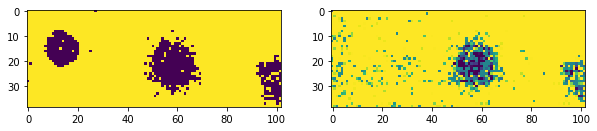

Epoch 1/3
1229488/1229488 [==============================] - 217s 176us/step - loss: 0.3650 - binary_accuracy: 0.9216
Epoch 2/3
1229488/1229488 [==============================] - 216s 176us/step - loss: 0.1109 - binary_accuracy: 0.9598
Epoch 3/3
1229488/1229488 [==============================] - 216s 176us/step - loss: 0.1051 - binary_accuracy: 0.9620
BRB04S-RECAL
6256/6256 [==============================] - 1s 88us/step
GS/raw_images/BRB04S-RECAL
0.987179487179
[[172   0]
 [  3  59]]


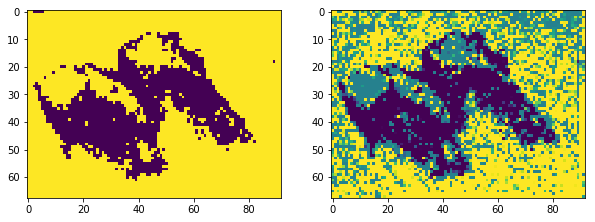

Mouse Kidney on coated plastic slide 300x165 30 um
49500/49500 [==============================] - 3s 68us/step
GS/raw_images/Mouse Kidney on coated plastic slide 300x165 30 um
0.87558685446
[[188  51]
 [  2 185]]


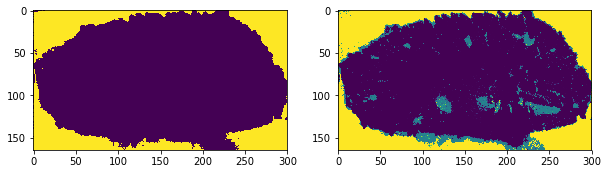

Epoch 1/3
1230814/1230814 [==============================] - 219s 178us/step - loss: 0.4405 - binary_accuracy: 0.9059
Epoch 2/3
1230814/1230814 [==============================] - 218s 177us/step - loss: 0.1056 - binary_accuracy: 0.9619
Epoch 3/3
1230814/1230814 [==============================] - 217s 177us/step - loss: 0.0993 - binary_accuracy: 0.9646
ICL__LNTO30_16_1
8930/8930 [==============================] - 1s 85us/step
GS/raw_images/ICL__LNTO30_16_1
0.957142857143
[[53  2]
 [ 1 14]]


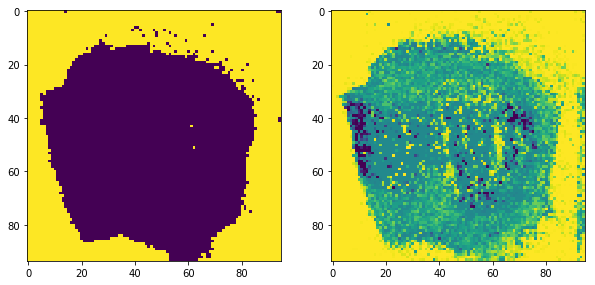

Mouse Kidney on plastic slide 260x175 30um
45500/45500 [==============================] - 3s 70us/step
GS/raw_images/Mouse Kidney on plastic slide 260x175 30um
0.970430107527
[[164  10]
 [  1 197]]


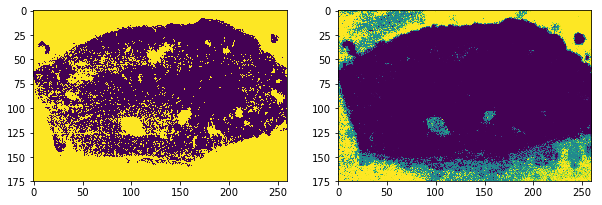

Epoch 1/3
1230375/1230375 [==============================] - 179s 145us/step - loss: 0.3014 - binary_accuracy: 0.9189
Epoch 2/3
1230375/1230375 [==============================] - 173s 140us/step - loss: 0.1066 - binary_accuracy: 0.9639
Epoch 3/3
1230375/1230375 [==============================] - 160s 130us/step - loss: 0.1011 - binary_accuracy: 0.9649
ICL__LNTO41_17_2
9504/9504 [==============================] - 1s 79us/step
GS/raw_images/ICL__LNTO41_17_2
0.994535519126
[[156   0]
 [  1  26]]


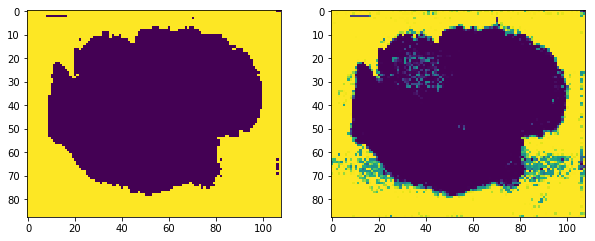

Rat50_Section1
45365/45365 [==============================] - 3s 64us/step
GS/raw_images/Rat50_Section1
0.980906921241
[[212   7]
 [  1 199]]


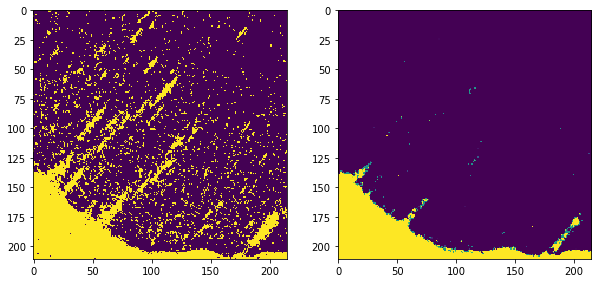

Epoch 1/3
1230088/1230088 [==============================] - 217s 177us/step - loss: 0.3210 - binary_accuracy: 0.9231
Epoch 2/3
1230088/1230088 [==============================] - 218s 177us/step - loss: 0.1094 - binary_accuracy: 0.9606
Epoch 3/3
1230088/1230088 [==============================] - 218s 177us/step - loss: 0.1023 - binary_accuracy: 0.9634
DESI porcine kidney interface region
43340/43340 [==============================] - 3s 73us/step
GS/raw_images/DESI porcine kidney interface region
1.0
[[469   0]
 [  0   7]]


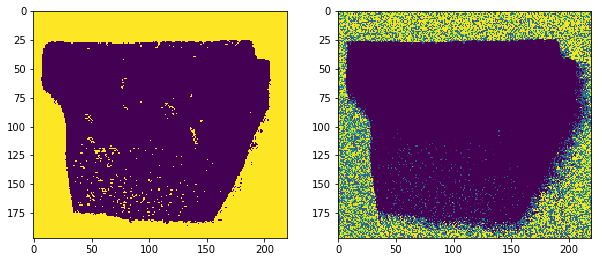

Dataset 18
10556/10556 [==============================] - 1s 66us/step
GS/raw_images/Dataset 18
0.994366197183
[[144   1]
 [  1 209]]


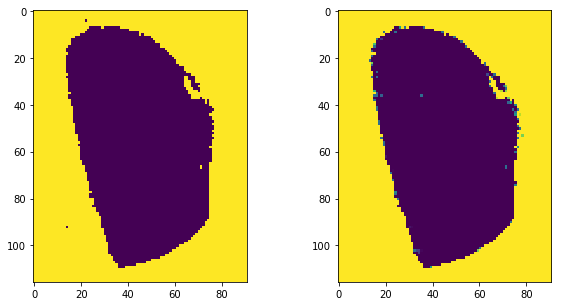

20170815_CGL_MT-M.B_DAN012_NTM_42x30_100x100
1260/1260 [==============================] - 0s 76us/step
GS/raw_images/20170815_CGL_MT-M.B_DAN012_NTM_42x30_100x100
0.980582524272
[[36  0]
 [ 2 65]]


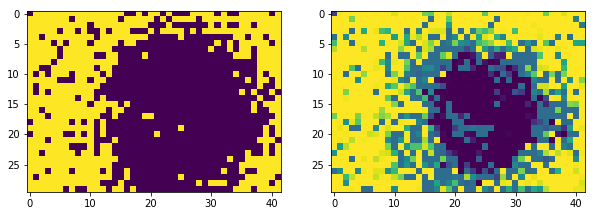

Epoch 1/3
1230858/1230858 [==============================] - 179s 145us/step - loss: 0.3668 - binary_accuracy: 0.9198
Epoch 2/3
1230858/1230858 [==============================] - 177s 144us/step - loss: 0.1069 - binary_accuracy: 0.9612
Epoch 3/3
1230858/1230858 [==============================] - 177s 143us/step - loss: 0.1010 - binary_accuracy: 0.9638
Dataset 4_recal
11186/11186 [==============================] - 1s 84us/step
GS/raw_images/Dataset 4_recal
0.963541666667
[[124   7]
 [  0  61]]


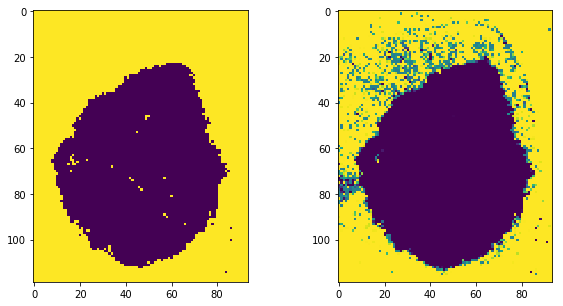

Mouse Kidney on coated plastic slide 270x160 30 um
43200/43200 [==============================] - 3s 67us/step
GS/raw_images/Mouse Kidney on coated plastic slide 270x160 30 um
0.955
[[130  15]
 [  3 252]]


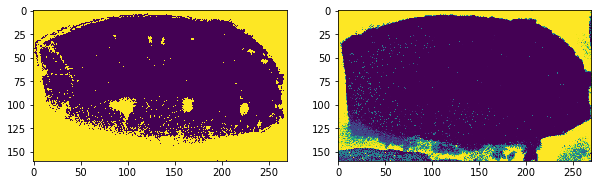

Epoch 1/3
1229265/1229265 [==============================] - 219s 179us/step - loss: 0.4119 - binary_accuracy: 0.9155
Epoch 2/3
1229265/1229265 [==============================] - 219s 178us/step - loss: 0.1135 - binary_accuracy: 0.9597
Epoch 3/3
1229265/1229265 [==============================] - 219s 178us/step - loss: 0.1056 - binary_accuracy: 0.9622
UoNotreDame__Untreated_6_574
5476/5476 [==============================] - 1s 109us/step
GS/raw_images/UoNotreDame__Untreated_6_574
0.945337620579
[[210   0]
 [ 17  84]]


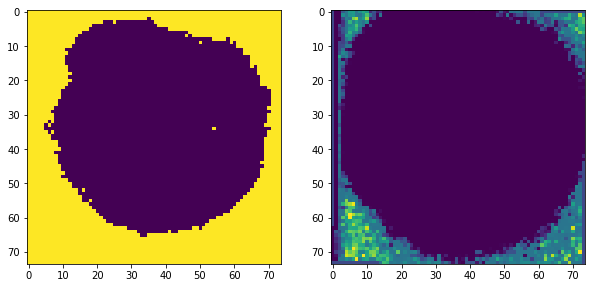

Kidney_280x140_40um_E0
39200/39200 [==============================] - 3s 69us/step
GS/raw_images/Kidney_280x140_40um_E0
0.988235294118
[[99  1]
 [ 1 69]]


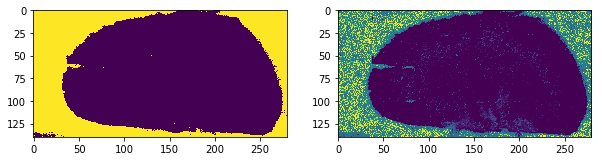

CC-Esco2_centroids
11303/11303 [==============================] - 1s 67us/step
GS/raw_images/CC-Esco2_centroids
0.987068965517
[[ 54   2]
 [  1 175]]


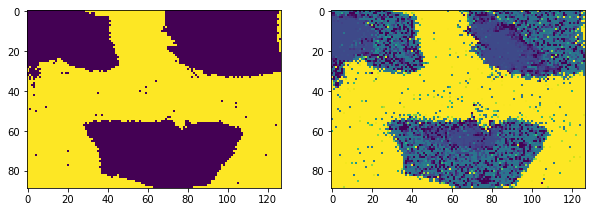

Epoch 1/3
1229500/1229500 [==============================] - 220s 179us/step - loss: 0.3679 - binary_accuracy: 0.9130
Epoch 2/3
1229500/1229500 [==============================] - 220s 179us/step - loss: 0.1115 - binary_accuracy: 0.9590
Epoch 3/3
1229500/1229500 [==============================] - 220s 179us/step - loss: 0.1032 - binary_accuracy: 0.9621
Dataset 3
11340/11340 [==============================] - 1s 97us/step
GS/raw_images/Dataset 3
0.985465116279
[[191   3]
 [  2 148]]


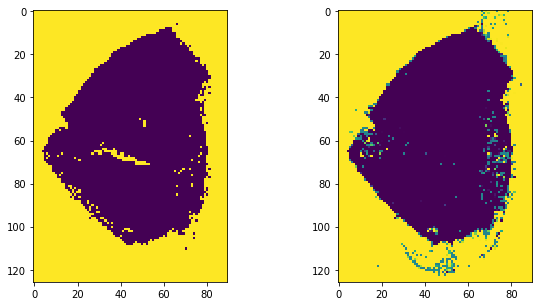

Mousebrain_MG08_2017_GruppeA
38804/38804 [==============================] - 3s 72us/step
GS/raw_images/Mousebrain_MG08_2017_GruppeA
0.993442622951
[[228   2]
 [  0  75]]


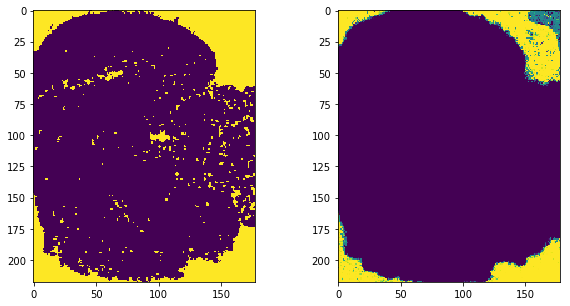

20170105_VS_disc2_NEDC0001_70x80_10x10
5600/5600 [==============================] - 0s 68us/step
GS/raw_images/20170105_VS_disc2_NEDC0001_70x80_10x10
0.0833333333333
[[ 0 10]
 [56  6]]


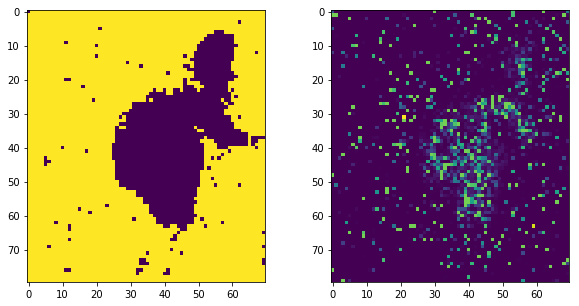

Epoch 1/3
1229328/1229328 [==============================] - 219s 178us/step - loss: 0.3649 - binary_accuracy: 0.9130
Epoch 2/3
1229328/1229328 [==============================] - 199s 162us/step - loss: 0.1116 - binary_accuracy: 0.9589
Epoch 3/3
1229328/1229328 [==============================] - 199s 162us/step - loss: 0.1056 - binary_accuracy: 0.9618
Tumor11
6160/6160 [==============================] - 1s 103us/step
GS/raw_images/Tumor11
0.975369458128
[[325   2]
 [  8  71]]


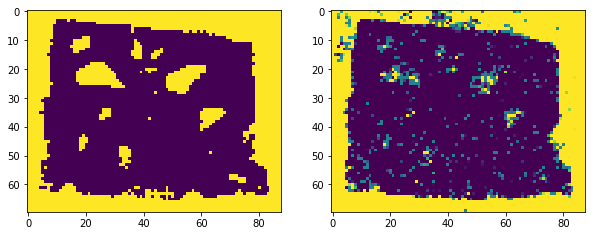

Dataset 3_recal
11340/11340 [==============================] - 1s 62us/step
GS/raw_images/Dataset 3_recal
0.996282527881
[[169   0]
 [  1  99]]


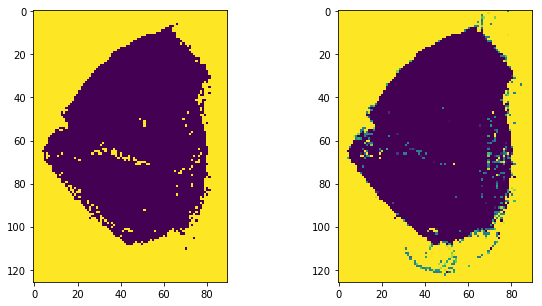

MP 39
38416/38416 [==============================] - 2s 61us/step
GS/raw_images/MP 39
0.980952380952
[[224   5]
 [  1  85]]


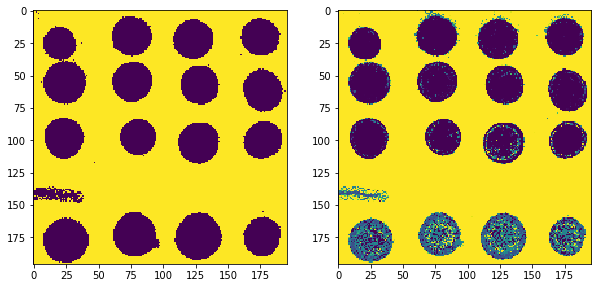

Epoch 1/3
1229466/1229466 [==============================] - 167s 135us/step - loss: 0.3779 - binary_accuracy: 0.9216
Epoch 2/3
1229466/1229466 [==============================] - 166s 135us/step - loss: 0.1101 - binary_accuracy: 0.9600
Epoch 3/3
1229466/1229466 [==============================] - 165s 135us/step - loss: 0.1038 - binary_accuracy: 0.9624
Tumor17
6760/6760 [==============================] - 1s 90us/step
GS/raw_images/Tumor17
0.972222222222
[[163   5]
 [  0  12]]


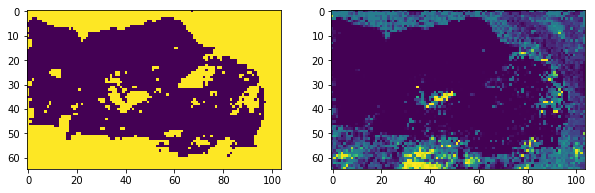

Dataset 30
12144/12144 [==============================] - 1s 50us/step
GS/raw_images/Dataset 30
0.997319034853
[[202   0]
 [  1 170]]


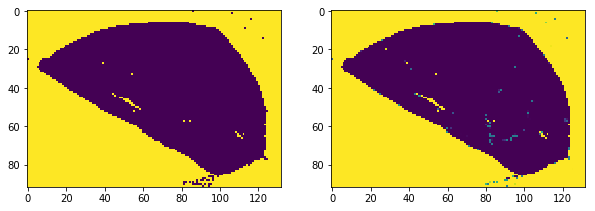

S648 WS20 205x170 20um E110
34850/34850 [==============================] - 2s 51us/step
GS/raw_images/S648 WS20 205x170 20um E110
0.936263736264
[[155  19]
 [ 10 271]]


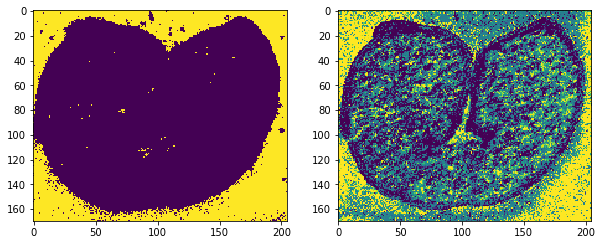

Borderline13
2024/2024 [==============================] - 0s 55us/step
GS/raw_images/Borderline13
0.957055214724
[[118   0]
 [  7  38]]


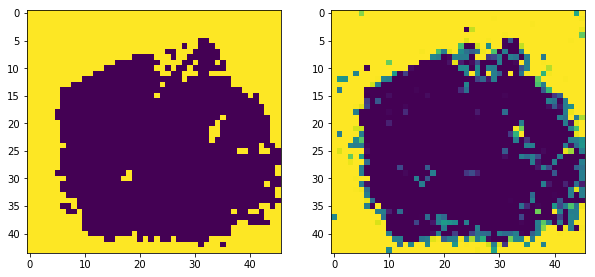

Epoch 1/3
1231310/1231310 [==============================] - 201s 163us/step - loss: 0.3577 - binary_accuracy: 0.9066
Epoch 2/3
1231310/1231310 [==============================] - 199s 162us/step - loss: 0.1079 - binary_accuracy: 0.9609
Epoch 3/3
1231310/1231310 [==============================] - 202s 164us/step - loss: 0.1028 - binary_accuracy: 0.9630
161007_WT1S1L1
12876/12876 [==============================] - 1s 72us/step
GS/raw_images/161007_WT1S1L1
0.994565217391
[[ 30   0]
 [  1 153]]


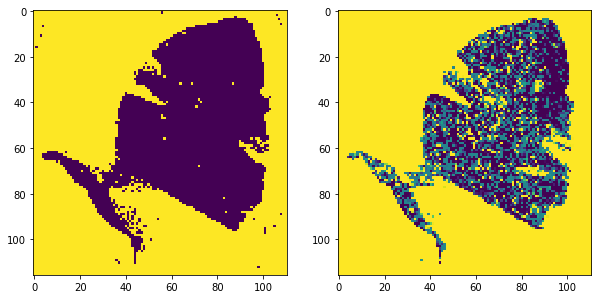

MS7_20170907_DHB_pos_MouseBrain_s3_300-1800_40um_245x134_A30-JBE-Test
32830/32830 [==============================] - 2s 51us/step
GS/raw_images/MS7_20170907_DHB_pos_MouseBrain_s3_300-1800_40um_245x134_A30-JBE-Test
0.893470790378
[[139  30]
 [  1 121]]


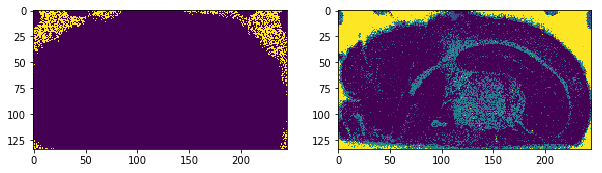

ICL__LNTO22_1_3
8228/8228 [==============================] - 1s 68us/step
GS/raw_images/ICL__LNTO22_1_3
0.987068965517
[[216   0]
 [  3  13]]


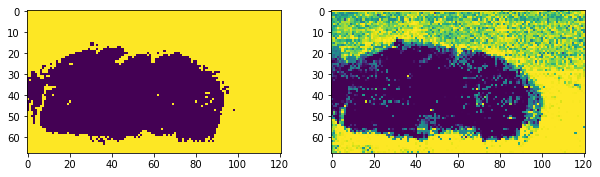

Epoch 1/3
1231155/1231155 [==============================] - 167s 136us/step - loss: 0.3278 - binary_accuracy: 0.9174
Epoch 2/3
1231155/1231155 [==============================] - 166s 135us/step - loss: 0.1106 - binary_accuracy: 0.9603
Epoch 3/3
1231155/1231155 [==============================] - 166s 135us/step - loss: 0.1033 - binary_accuracy: 0.9629
MPIMM_049_QE_P_BA_CF_sp3
32000/32000 [==============================] - 2s 70us/step
GS/raw_images/MPIMM_049_QE_P_BA_CF_sp3
0.987341772152
[[135   0]
 [  2  21]]


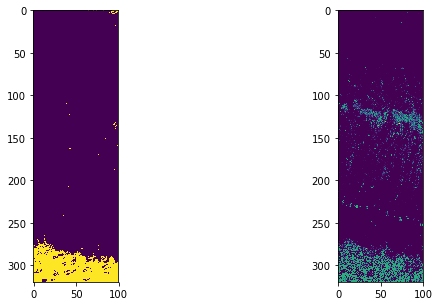

20180220_mouse eye_DHB
8464/8464 [==============================] - 1s 64us/step
GS/raw_images/20180220_mouse eye_DHB
0.905660377358
[[244  14]
 [ 21  92]]


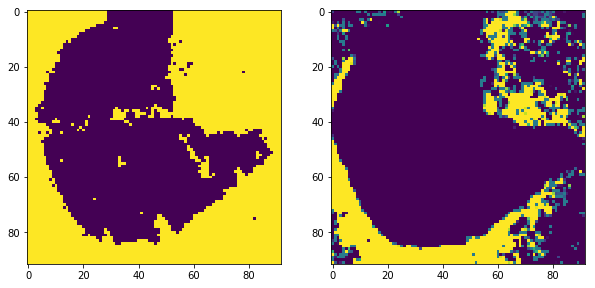

Dataset 8
13625/13625 [==============================] - 1s 62us/step
GS/raw_images/Dataset 8
0.920353982301
[[33  7]
 [ 2 71]]


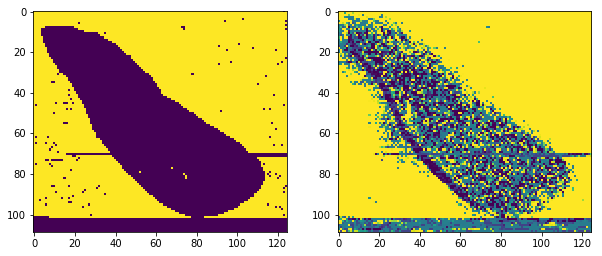

Epoch 1/3
1230696/1230696 [==============================] - 201s 164us/step - loss: 0.3288 - binary_accuracy: 0.9249
Epoch 2/3
1230696/1230696 [==============================] - 201s 164us/step - loss: 0.1102 - binary_accuracy: 0.9602
Epoch 3/3
1230696/1230696 [==============================] - 202s 164us/step - loss: 0.1047 - binary_accuracy: 0.9622
Esco1_centroids
13892/13892 [==============================] - 1s 89us/step
GS/raw_images/Esco1_centroids
0.992907801418
[[ 30   1]
 [  1 250]]


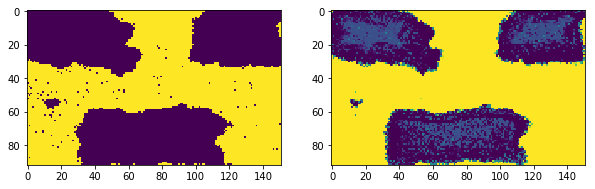

2017023_ADP_GFlarvae_55x55_40x40_DMAN002
3025/3025 [==============================] - 0s 66us/step
GS/raw_images/2017023_ADP_GFlarvae_55x55_40x40_DMAN002
0.991452991453
[[ 67   1]
 [  1 165]]


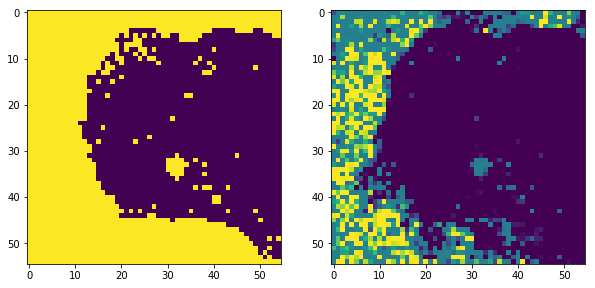

170418_MouseBrain_pos_50um_205by129_atn0
26445/26445 [==============================] - 2s 63us/step
GS/raw_images/170418_MouseBrain_pos_50um_205by129_atn0
0.976923076923
[[148   4]
 [  2 106]]


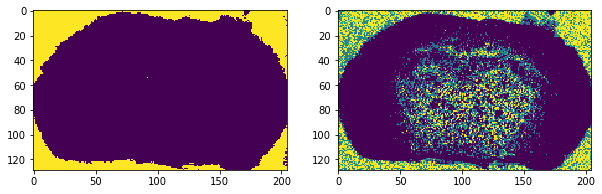

Dataset 4
11186/11186 [==============================] - 1s 65us/step
GS/raw_images/Dataset 4
0.965648854962
[[108   4]
 [  5 145]]


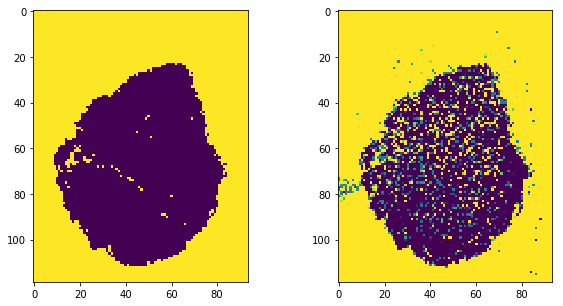

Epoch 1/3
1230484/1230484 [==============================] - 202s 164us/step - loss: 0.3219 - binary_accuracy: 0.9253
Epoch 2/3
1230484/1230484 [==============================] - 201s 163us/step - loss: 0.1071 - binary_accuracy: 0.9620
Epoch 3/3
1230484/1230484 [==============================] - 201s 164us/step - loss: 0.1000 - binary_accuracy: 0.9642
Dataset 31
11600/11600 [==============================] - 1s 98us/step
GS/raw_images/Dataset 31
0.995085995086
[[197   0]
 [  2 208]]


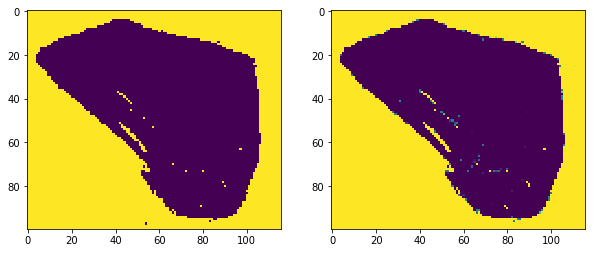

Mouse_Wholebody_3
14100/14100 [==============================] - 1s 64us/step
GS/raw_images/Mouse_Wholebody_3
0.655737704918
[[174  53]
 [ 73  66]]


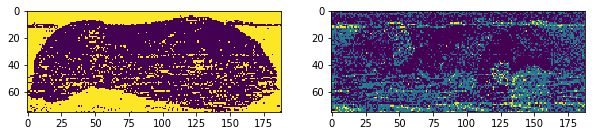

PS_7_P7_N1_30um_New
22620/22620 [==============================] - 1s 63us/step
GS/raw_images/PS_7_P7_N1_30um_New
0.9375
[[91  0]
 [ 9 44]]


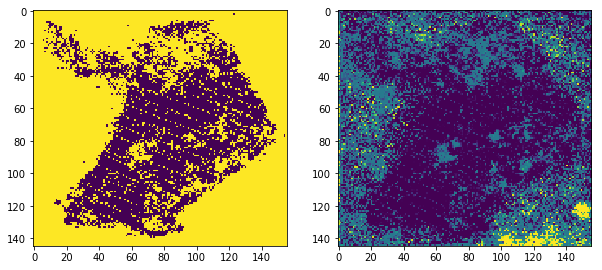

NCSU_mouse_LCC6_tumor
6440/6440 [==============================] - 0s 52us/step
GS/raw_images/NCSU_mouse_LCC6_tumor
0.983606557377
[[157   1]
 [  2  23]]


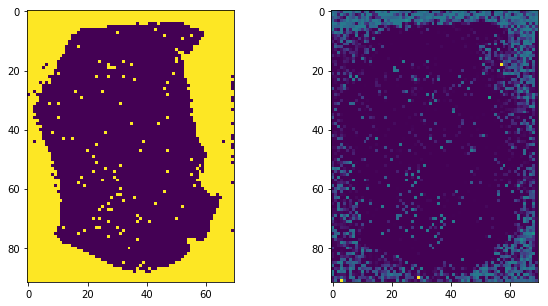

Epoch 1/3
1228889/1228889 [==============================] - 202s 165us/step - loss: 0.3326 - binary_accuracy: 0.9175
Epoch 2/3
1228889/1228889 [==============================] - 201s 163us/step - loss: 0.1088 - binary_accuracy: 0.9603
Epoch 3/3
1228889/1228889 [==============================] - 201s 163us/step - loss: 0.1025 - binary_accuracy: 0.9624
Normal8
2652/2652 [==============================] - 1s 214us/step
GS/raw_images/Normal8
0.982269503546
[[254   5]
 [  0  23]]


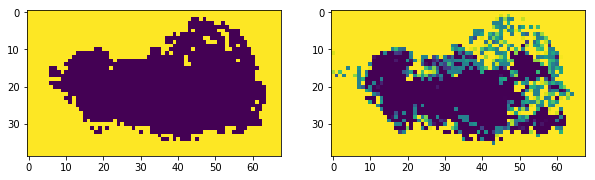

Esco2_centroids
14848/14848 [==============================] - 1s 66us/step
GS/raw_images/Esco2_centroids
0.996254681648
[[ 14   0]
 [  1 252]]


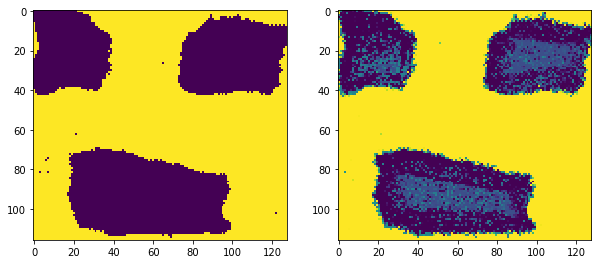

ICL__LNTO31_17_4
12221/12221 [==============================] - 1s 63us/step
GS/raw_images/ICL__LNTO31_17_4
0.99504950495
[[171   0]
 [  1  30]]


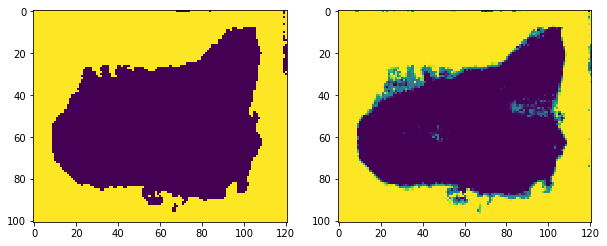

ICL__LNTO41_17_4
6642/6642 [==============================] - 0s 67us/step
GS/raw_images/ICL__LNTO41_17_4
0.995918367347
[[216   1]
 [  0  28]]


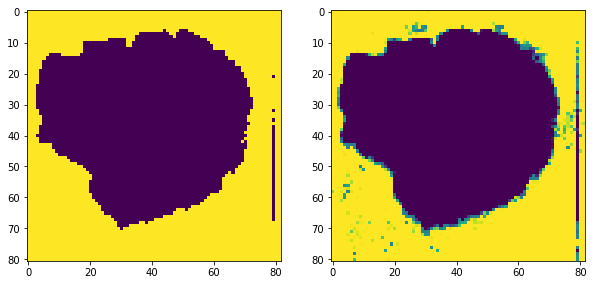

ICL__7TopRight,_17BottomRight,_27BottomLeft,_37TopLeft
19992/19992 [==============================] - 1s 64us/step
GS/raw_images/ICL__7TopRight,_17BottomRight,_27BottomLeft,_37TopLeft
0.993650793651
[[265   1]
 [  1  48]]


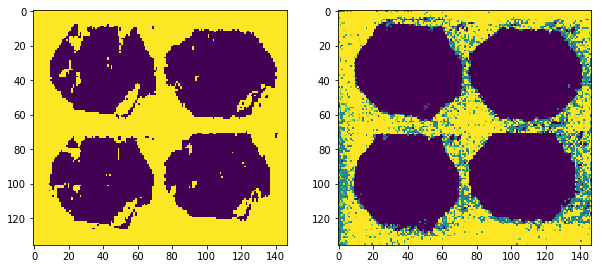

Epoch 1/3
1229831/1229831 [==============================] - 172s 140us/step - loss: 0.3383 - binary_accuracy: 0.9181
Epoch 2/3
1229831/1229831 [==============================] - 170s 138us/step - loss: 0.1124 - binary_accuracy: 0.9594
Epoch 3/3
1229831/1229831 [==============================] - 169s 138us/step - loss: 0.1064 - binary_accuracy: 0.9614
Xenograft_3_135um
19516/19516 [==============================] - 2s 82us/step
GS/raw_images/Xenograft_3_135um
0.990445859873
[[220   1]
 [  2  91]]


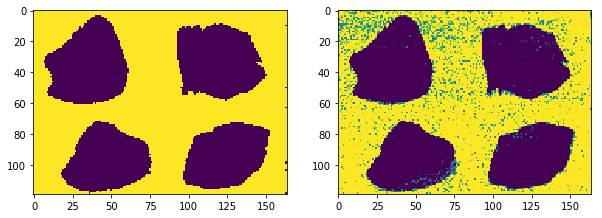

Borderline14
1575/1575 [==============================] - 0s 71us/step
GS/raw_images/Borderline14
0.993197278912
[[128   0]
 [  1  18]]


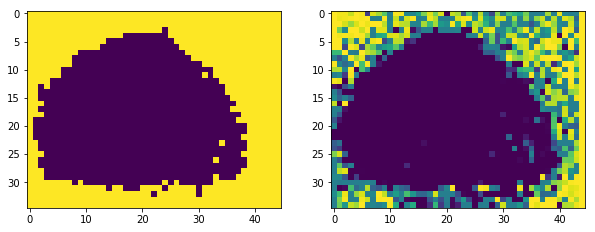

LNTO31_17_1-RECAL
6642/6642 [==============================] - 0s 65us/step
GS/raw_images/LNTO31_17_1-RECAL
0.981012658228
[[146   3]
 [  0   9]]


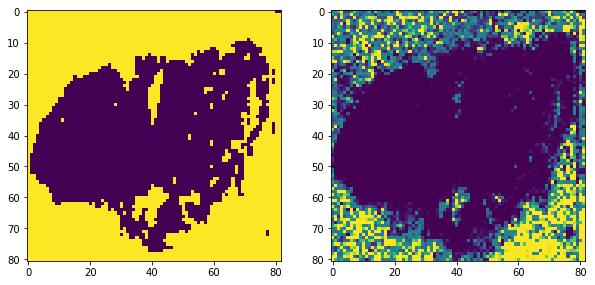

Dataset 21
15015/15015 [==============================] - 1s 66us/step
GS/raw_images/Dataset 21
0.995180722892
[[185   0]
 [  2 228]]


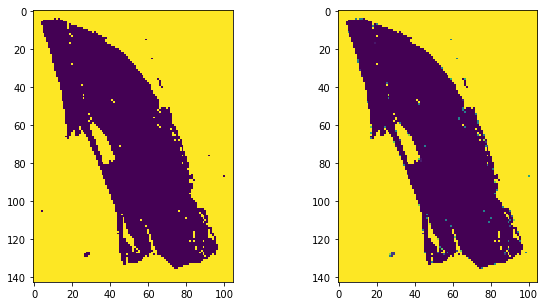

Rat51_Section2
12665/12665 [==============================] - 1s 64us/step
GS/raw_images/Rat51_Section2
0.925742574257
[[ 73  15]
 [  0 114]]


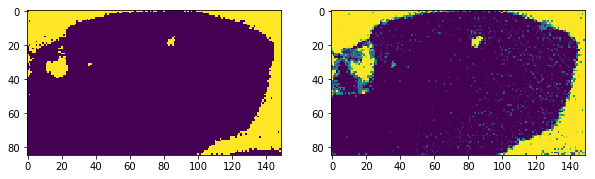

Epoch 1/3
1231265/1231265 [==============================] - 204s 166us/step - loss: 0.4007 - binary_accuracy: 0.9149
Epoch 2/3
1231265/1231265 [==============================] - 202s 164us/step - loss: 0.1101 - binary_accuracy: 0.9598
Epoch 3/3
1231265/1231265 [==============================] - 202s 164us/step - loss: 0.1036 - binary_accuracy: 0.9621
ICL__A51 CT S3-centroid
15125/15125 [==============================] - 1s 92us/step
GS/raw_images/ICL__A51 CT S3-centroid
0.958847736626
[[180   5]
 [  5  53]]


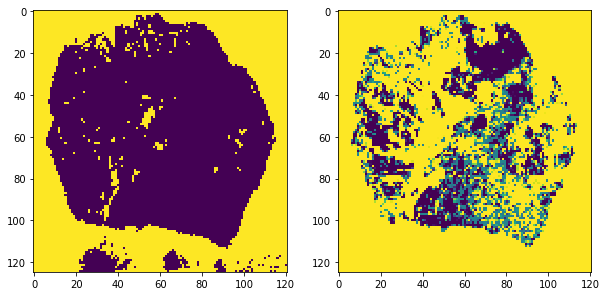

ICL__LNTO42_17_1
7209/7209 [==============================] - 0s 64us/step
GS/raw_images/ICL__LNTO42_17_1
0.981751824818
[[172   4]
 [  1  97]]


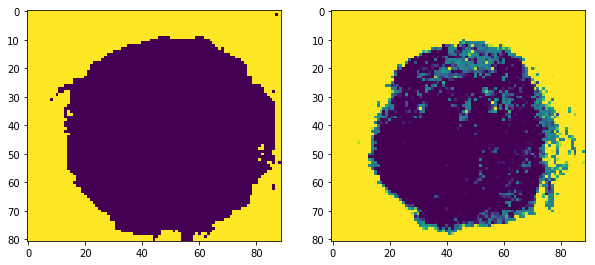

Dataset 2
12876/12876 [==============================] - 1s 66us/step
GS/raw_images/Dataset 2
0.978723404255
[[174   1]
 [  7 194]]


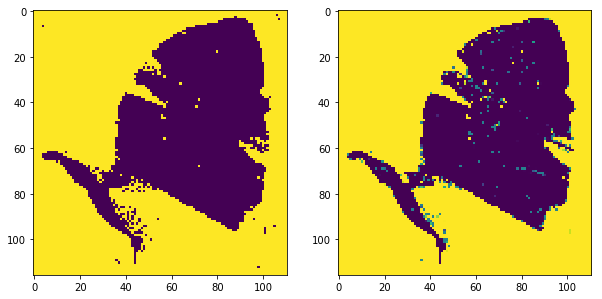

Dataset 26_recal
18769/18769 [==============================] - 1s 64us/step
GS/raw_images/Dataset 26_recal
1.0
[[176   0]
 [  0 138]]


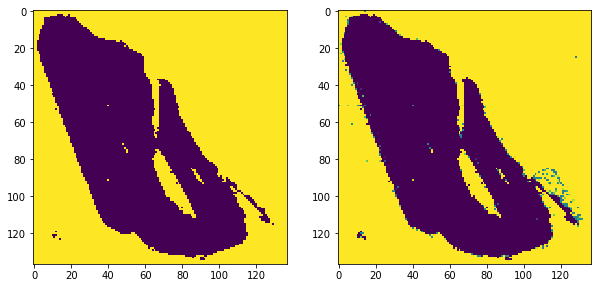

Epoch 1/3
1230887/1230887 [==============================] - 203s 165us/step - loss: 0.3149 - binary_accuracy: 0.9192
Epoch 2/3
1230887/1230887 [==============================] - 202s 164us/step - loss: 0.1105 - binary_accuracy: 0.9605
Epoch 3/3
1230887/1230887 [==============================] - 203s 165us/step - loss: 0.1041 - binary_accuracy: 0.9631
Dataset 16
11662/11662 [==============================] - 1s 105us/step
GS/raw_images/Dataset 16
0.992346938776
[[191   2]
 [  1 198]]


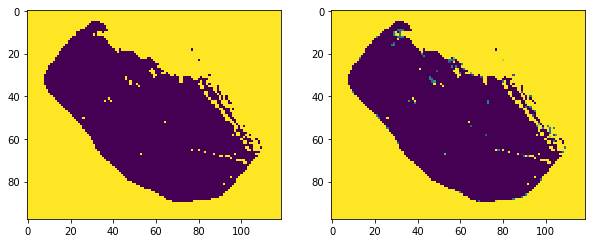

S649 WS21 155x105 15um E110
16275/16275 [==============================] - 1s 64us/step
GS/raw_images/S649 WS21 155x105 15um E110
0.971563981043
[[328  11]
 [  1  82]]


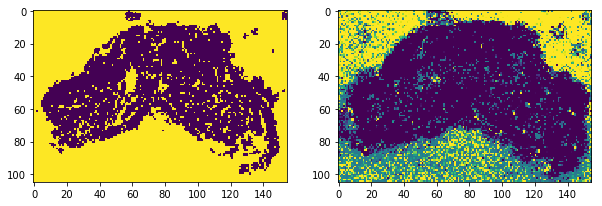

Dataset 27
18632/18632 [==============================] - 1s 65us/step
GS/raw_images/Dataset 27
0.99727520436
[[155   0]
 [  1 211]]


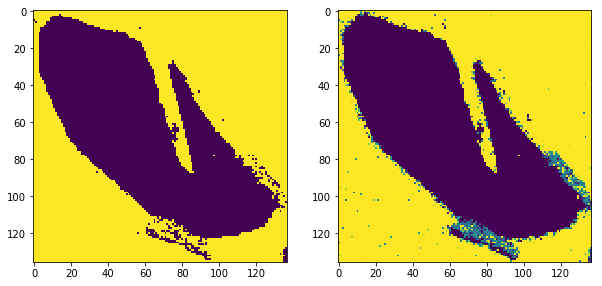

NCSU_M8_mouse_brain
7788/7788 [==============================] - 1s 66us/step
GS/raw_images/NCSU_M8_mouse_brain
0.953216374269
[[ 68   1]
 [ 15 258]]


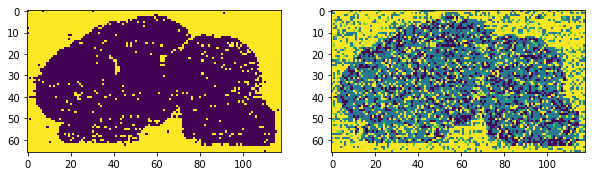

Epoch 1/3
1229957/1229957 [==============================] - 205s 167us/step - loss: 0.3666 - binary_accuracy: 0.9155
Epoch 2/3
1229957/1229957 [==============================] - 203s 165us/step - loss: 0.1106 - binary_accuracy: 0.9596
Epoch 3/3
1229957/1229957 [==============================] - 205s 166us/step - loss: 0.1047 - binary_accuracy: 0.9620
Tumor41
1394/1394 [==============================] - 1s 420us/step
GS/raw_images/Tumor41
0.978021978022
[[71  1]
 [ 1 18]]


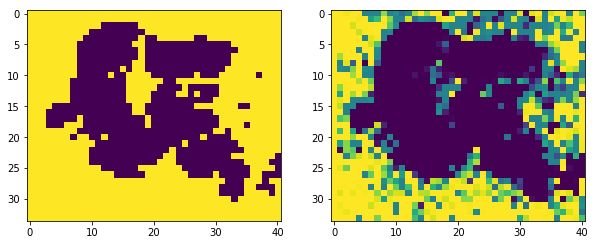

Dataset 23
17262/17262 [==============================] - 1s 66us/step
GS/raw_images/Dataset 23
0.997206703911
[[171   1]
 [  0 186]]


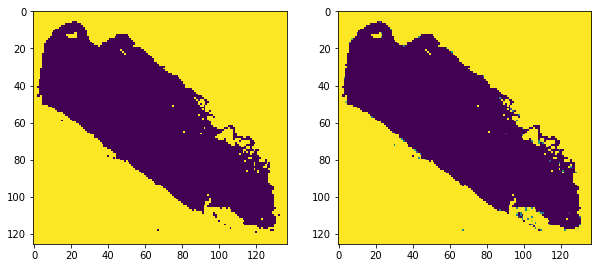

ST-Pseudo_centroids
12684/12684 [==============================] - 1s 64us/step
GS/raw_images/ST-Pseudo_centroids
0.982222222222
[[ 21   3]
 [  1 200]]


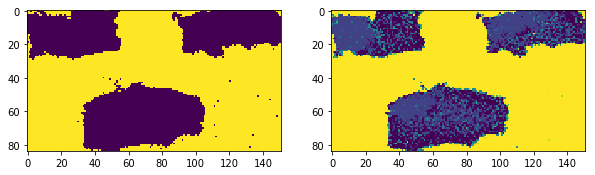

20170503_ADP-JS_CD1-Brain_dan005_117x143_60x60_N
16731/16731 [==============================] - 1s 65us/step
GS/raw_images/20170503_ADP-JS_CD1-Brain_dan005_117x143_60x60_N
0.995098039216
[[ 99   2]
 [  0 307]]


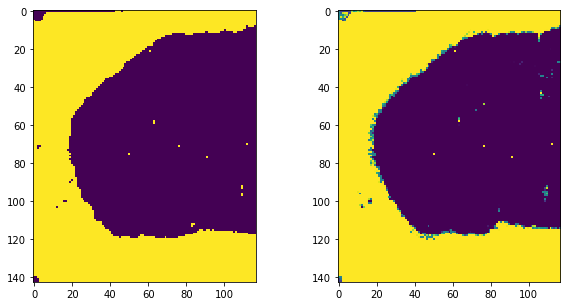

ICL__LNTO26_7_3
7216/7216 [==============================] - 0s 65us/step
GS/raw_images/ICL__LNTO26_7_3
1.0
[[195   0]
 [  0  17]]


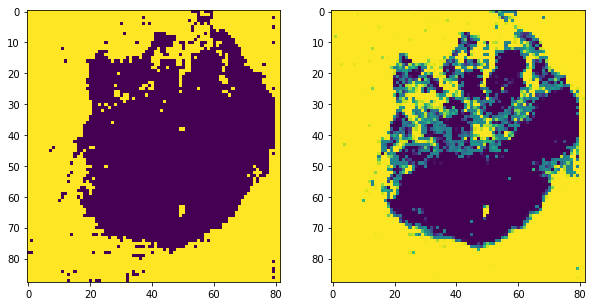

CPU times: user 4h 6min 41s, sys: 35min 36s, total: 4h 42min 17s
Wall time: 3h 42min 3s


In [12]:
%%time

metrics = []
prob_masks = {}
u_groups_n = np.unique(groups).shape[0]
cv = sklearn.model_selection.GroupKFold(n_splits=int(np.ceil(u_groups_n/3)))
print(f'CV with {cv.n_splits} splits')

for train_inds, valid_inds in cv.split(X, y, groups):
    X_train, y_train, groups_train = X[train_inds], y[train_inds], groups[train_inds]
    X_valid, y_valid, groups_valid = X[valid_inds], y[valid_inds], groups[valid_inds]
#     X_train, X_valid = utils.pca_transform(X_train, X_valid, n_components=100)
    
    ### First level model ###

#     model = sklearn.linear_model.logistic.LogisticRegression(solver='saga', max_iter=100)
    model = KerasClassifier(create_build_model(feature_n=X_train.shape[-1]),
                            batch_size=64, epochs=3, verbose=1)
    model.fit(X_train, y_train)
    
    ds_names = [all_ds_names[g] for g in np.unique(groups_valid)]
    for ds_name in ds_names:
        print(ds_name)
        group = utils.find_ind(all_ds_names, ds_name)
        y_prob = model.predict_proba(X_valid[groups_valid == group])[:,1]
        mask = masks[ds_name]
        prob_mask = y_prob.reshape(mask.shape)
        prob_masks[ds_name] = prob_mask

        ### Second level model ###

        X_mm_test, y_mm_test, groups_mm_test = \
            utils.prepare_mask_match_xygroups([gs_path / ds_name], {ds_name: prob_mask})
        y_mm_pred = (X_mm_test[:,0] > 0).astype(int)
        acc = sklearn.metrics.accuracy_score(y_mm_test, y_mm_pred)
        print(acc)
        conf_matrix = sklearn.metrics.confusion_matrix(y_mm_test, y_mm_pred)
        print(conf_matrix)

        metrics.append({
            'ds_name': ds_name,
            'acc': acc,
            'conf_m': conf_matrix
        })
        utils.plot_masks(mask, [prob_mask])

metrics_df = pd.DataFrame(metrics)

In [13]:
metrics_df.acc.agg([np.mean, np.std])

mean    0.953525
std     0.120242
Name: acc, dtype: float64

In [15]:
metrics_df.sort_values(by='acc', ascending=False)

,acc,conf_m,ds_name
65,1.000000,"[[195, 0], [0, 17]]",ICL__LNTO26_7_3
56,1.000000,"[[176, 0], [0, 138]]",Dataset 26_recal
11,1.000000,"[[469, 0], [0, 7]]",DESI porcine kidney interface region
26,0.997319,"[[202, 0], [1, 170]]",Dataset 30
59,0.997275,"[[155, 0], [1, 211]]",Dataset 27
62,0.997207,"[[171, 1], [0, 186]]",Dataset 23
23,0.996283,"[[169, 0], [1, 99]]",Dataset 3_recal
44,0.996255,"[[14, 0], [1, 252]]",Esco2_centroids
46,0.995918,"[[216, 1], [0, 28]]",ICL__LNTO41_17_4
51,0.995181,"[[185, 0], [2, 228]]",Dataset 21


In [16]:
metrics_df[metrics_df.ds_name != '20170105_VS_disc2_NEDC0001_70x80_10x10'].acc.agg([np.mean, np.std])

mean    0.966912
std     0.051674
Name: acc, dtype: float64